In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
#importing the dataset
Houseprice_df=pd.read_csv('innercity.csv')

In [3]:
#dataset
Houseprice_df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [4]:
#Five point summary
Houseprice_df.describe()

cid         price      room_bed     room_bath  living_measure  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000    21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757     2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163      918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000      290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000     1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000     1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000     2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000    13540.000000   

        lot_measure          ceil         coast         sight     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...      basement      yr_built  yr_renovated       zipcode  \
count  ...  21613.000000  21613.000000  21613.000000  21613.000000   
mean   ...    291.509045   1971.005136     84.402258  98077.939805   
std    ...    442.575043     29.373411    401.679240     53.505026   
min    ...      0.000000   1900.000000      0.000000  98001.000000   
25%    ...      0.000000   1951.000000      0.000000  98033.000000   
50%    ...      0.000000   1975.000000      0.000000  98065.000000   
75%    ...    560.000000   1997.000000      0.000000  98118.000000   
max    ...   4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  living_measure15  lot_measure15  \
count  21613.000000  21613.000000      21613.000000   21613.000000   
mean      47.560053   -122.213896       1986.552492   12768.455652   
std        0.138564      0.140828        685.391304   27304.179631   
min       47.155900   -122.519000        399.000000     651.000000   
25%       47.471000   -122.328000       1490.000000    5100.000000   
50%       47.571800   -122.230000       1840.000000    7620.000000   
75%       47.678000   -122.125000       2360.000000   10083.000000   
max       47.777600   -121.315000       6210.000000  871200.000000   

          furnished    total_area  
count  21613.000000  2.161300e+04  
mean       0.196687  1.718687e+04  
std        0.397503  4.158908e+04  
min        0.000000  1.423000e+03  
25%        0.000000  7.035000e+03  
50%        0.000000  9.575000e+03  
75%        0.000000  1.300000e+04  
max        1.000000  1.652659e+06  

[8 rows x 22 columns]

In [5]:
#its the transpose of the dataset which shows NAN /Null values
Houseprice_df.describe(include='all').T

count unique              top freq        mean          std  \
cid               21613    NaN              NaN  NaN  4.5803e+09  2.87657e+09   
dayhours          21613    372  20140623T000000  142         NaN          NaN   
price             21613    NaN              NaN  NaN      540182       367362   
room_bed          21613    NaN              NaN  NaN     3.37084     0.930062   
room_bath         21613    NaN              NaN  NaN     2.11476     0.770163   
living_measure    21613    NaN              NaN  NaN      2079.9      918.441   
lot_measure       21613    NaN              NaN  NaN       15107      41420.5   
ceil              21613    NaN              NaN  NaN     1.49431     0.539989   
coast             21613    NaN              NaN  NaN  0.00754176    0.0865172   
sight             21613    NaN              NaN  NaN    0.234303     0.766318   
condition         21613    NaN              NaN  NaN     3.40943     0.650743   
quality           21613    NaN              NaN  NaN     7.65687      1.17546   
ceil_measure      21613    NaN              NaN  NaN     1788.39      828.091   
basement          21613    NaN              NaN  NaN     291.509      442.575   
yr_built          21613    NaN              NaN  NaN     1971.01      29.3734   
yr_renovated      21613    NaN              NaN  NaN     84.4023      401.679   
zipcode           21613    NaN              NaN  NaN     98077.9       53.505   
lat               21613    NaN              NaN  NaN     47.5601     0.138564   
long              21613    NaN              NaN  NaN    -122.214     0.140828   
living_measure15  21613    NaN              NaN  NaN     1986.55      685.391   
lot_measure15     21613    NaN              NaN  NaN     12768.5      27304.2   
furnished         21613    NaN              NaN  NaN    0.196687     0.397503   
total_area        21613    NaN              NaN  NaN     17186.9      41589.1   

                         min          25%          50%         75%  \
cid               1.0001e+06  2.12305e+09  3.90493e+09  7.3089e+09   
dayhours                 NaN          NaN          NaN         NaN   
price                  75000       321950       450000      645000   
room_bed                   0            3            3           4   
room_bath                  0         1.75         2.25         2.5   
living_measure           290         1427         1910        2550   
lot_measure              520         5040         7618       10688   
ceil                       1            1          1.5           2   
coast                      0            0            0           0   
sight                      0            0            0           0   
condition                  1            3            3           4   
quality                    1            7            7           8   
ceil_measure             290         1190         1560        2210   
basement                   0            0            0         560   
yr_built                1900         1951         1975        1997   
yr_renovated               0            0            0           0   
zipcode                98001        98033        98065       98118   
lat                  47.1559       47.471      47.5718      47.678   
long                -122.519     -122.328      -122.23    -122.125   
living_measure15         399         1490         1840        2360   
lot_measure15            651         5100         7620       10083   
furnished                  0            0            0           0   
total_area              1423         7035         9575       13000   

                          max  
cid                   9.9e+09  
dayhours                  NaN  
price                 7.7e+06  
room_bed                   33  
room_bath                   8  
living_measure          13540  
lot_measure       1.65136e+06  
ceil                      3.5  
coast                       1  
sight                       4  
condition                   5  
quality 

In [6]:
#This shows the data type as well as null values (if any)
Houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [7]:
#Data types of the dataset
Houseprice_df.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object

In [8]:
# This shows the no of columns and rows in the dataset
Houseprice_df.shape

(21613, 23)

In [9]:
# There is no null value as its shown as false
Houseprice_df.isnull().any()

cid                 False
dayhours            False
price               False
room_bed            False
room_bath           False
living_measure      False
lot_measure         False
ceil                False
coast               False
sight               False
condition           False
quality             False
ceil_measure        False
basement            False
yr_built            False
yr_renovated        False
zipcode             False
lat                 False
long                False
living_measure15    False
lot_measure15       False
furnished           False
total_area          False
dtype: bool

In [10]:
# Number of null values are 0 in each column
Houseprice_df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [11]:
#Checking dupicate values
Houseprice_df.duplicated().sum()

0

In [12]:
#Converting the dayhours column to sold_year & removing dayhours column.
Houseprice_df["sold_year"] = Houseprice_df["dayhours"].apply(lambda x:x.split('T')[0][:4])
Houseprice_df = Houseprice_df.drop(columns = 'dayhours')
Houseprice_df.head()

cid   price  room_bed  room_bath  living_measure  lot_measure  ceil  \
0  3034200666  808100         4       3.25            3020        13457   1.0   
1  8731981640  277500         4       2.50            2550         7500   1.0   
2  5104530220  404000         3       2.50            2370         4324   2.0   
3  6145600285  300000         2       1.00             820         3844   1.0   
4  8924100111  699000         2       1.50            1400         4050   1.0   

   coast  sight  condition  ...  yr_built  yr_renovated  zipcode      lat  \
0      0      0          5  ...      1956             0    98133  47.7174   
1      0      0          3  ...      1976             0    98023  47.3165   
2      0      0          3  ...      2006             0    98038  47.3515   
3      0      0          4  ...      1916             0    98133  47.7049   
4      0      0          4  ...      1954             0    98115  47.6768   

      long  living_measure15  lot_measure15  furnished  total_area  sold_year  
0 -122.336              2120           7553          1       16477       2014  
1 -122.386              2260           8800          0       10050       2014  
2 -121.999              2370           4348          0        6694       2015  
3 -122.349              1520           3844          0        4664       2014  
4 -122.269              1900           5940          0        5450       2015  

[5 rows x 23 columns]

In [13]:
#Converting Houseprice_dftype to interger.
Houseprice_df['sold_year']  = Houseprice_df['sold_year'].astype('int')

In [14]:
Houseprice_df['sold_year'].dtypes

dtype('int32')

In [15]:
#creating age column based on yr built and sold yr
Houseprice_df['Age']= Houseprice_df['sold_year'] - Houseprice_df['yr_built']

In [16]:
Houseprice_df.head()

cid   price  room_bed  room_bath  living_measure  lot_measure  ceil  \
0  3034200666  808100         4       3.25            3020        13457   1.0   
1  8731981640  277500         4       2.50            2550         7500   1.0   
2  5104530220  404000         3       2.50            2370         4324   2.0   
3  6145600285  300000         2       1.00             820         3844   1.0   
4  8924100111  699000         2       1.50            1400         4050   1.0   

   coast  sight  condition  ...  yr_renovated  zipcode      lat     long  \
0      0      0          5  ...             0    98133  47.7174 -122.336   
1      0      0          3  ...             0    98023  47.3165 -122.386   
2      0      0          3  ...             0    98038  47.3515 -121.999   
3      0      0          4  ...             0    98133  47.7049 -122.349   
4      0      0          4  ...             0    98115  47.6768 -122.269   

   living_measure15  lot_measure15  furnished  total_area  sold_year  Age  
0              2120           7553          1       16477       2014   58  
1              2260           8800          0       10050       2014   38  
2              2370           4348          0        6694       2015    9  
3              1520           3844          0        4664       2014   98  
4              1900           5940          0        5450       2015   61  

[5 rows x 24 columns]

In [17]:
#Dropping cid & zipcode column & soldyr
Houseprice_df = Houseprice_df.drop(columns ='cid')
Houseprice_df= Houseprice_df.drop(columns="zipcode")
Houseprice_df= Houseprice_df.drop(columns="sold_year")

The houses which are not renovated is mentioned as '0' and the renovated house is mentioned as year. So we will be facing outliers. For this we need to convert the year of renovated house to '1'.

In [18]:
Houseprice_df.loc[Houseprice_df['yr_renovated'] > 0, 'yr_renovated'] = 1
Houseprice_df["yr_renovated"].value_counts()

0    20699
1      914
Name: yr_renovated, dtype: int64

So, we have 914 houses which are renovated and 20699 houses, not renovated

In [19]:
# Correlation matrix, 1-positive ,-1 negative,0-not related
corr=Houseprice_df.corr()
corr

price  room_bed  room_bath  living_measure  lot_measure  \
price             1.000000  0.308338   0.525134        0.702044     0.089655   
room_bed          0.308338  1.000000   0.515884        0.576671     0.031703   
room_bath         0.525134  0.515884   1.000000        0.754665     0.087740   
living_measure    0.702044  0.576671   0.754665        1.000000     0.172826   
lot_measure       0.089655  0.031703   0.087740        0.172826     1.000000   
ceil              0.256786  0.175429   0.500653        0.353949    -0.005201   
coast             0.266331 -0.006582   0.063744        0.103818     0.021604   
sight             0.397346  0.079532   0.187737        0.284611     0.074710   
condition         0.036392  0.028472  -0.124982       -0.058753    -0.008958   
quality           0.667463  0.356967   0.664983        0.762704     0.113621   
ceil_measure      0.605566  0.477600   0.685342        0.876597     0.183512   
basement          0.323837  0.303093   0.283770        0.435043     0.015286   
yr_built          0.053982  0.154178   0.506019        0.318049     0.053080   
yr_renovated      0.126101  0.018553   0.050260        0.055094     0.007745   
lat               0.306919 -0.008931   0.024573        0.052529    -0.085683   
long              0.021571  0.129473   0.223042        0.240223     0.229521   
living_measure15  0.585374  0.391638   0.568634        0.756420     0.144608   
lot_measure15     0.082456  0.029244   0.087175        0.183286     0.718557   
furnished         0.565991  0.259268   0.484923        0.632947     0.118883   
total_area        0.104796  0.044310   0.104050        0.194209     0.999763   
Age              -0.053921 -0.154324  -0.506407       -0.318488    -0.052990   

                      ceil     coast     sight  condition   quality  ...  \
price             0.256786  0.266331  0.397346   0.036392  0.667463  ...   
room_bed          0.175429 -0.006582  0.079532   0.028472  0.356967  ...   
room_bath         0.500653  0.063744  0.187737  -0.124982  0.664983  ...   
living_measure    0.353949  0.103818  0.284611  -0.058753  0.762704  ...   
lot_measure      -0.005201  0.021604  0.074710  -0.008958  0.113621  ...   
ceil              1.000000  0.023698  0.029444  -0.263768  0.458183  ...   
coast             0.023698  1.000000  0.401857   0.016653  0.082775  ...   
sight             0.029444  0.401857  1.000000   0.045990  0.251321  ...   
condition        -0.263768  0.016653  0.045990   1.000000 -0.144674  ...   
quality           0.458183  0.082775  0.251321  -0.144674  1.000000  ...   
ceil_measure      0.523885  0.072075  0.167649  -0.158214  0.755923  ...   
basement         -0.245705  0.080588  0.276947   0.174105  0.168392  ...   
yr_built          0.489319 -0.026161 -0.053440  -0.361417  0.446963  ...   
yr_renovated      0.006260  0.093294  0.104062  -0.060139  0.014008  ...   
lat               0.049614 -0.014274  0.006157  -0.014941  0.114084  ...   
long              0.125419 -0.041910 -0.078400  -0.106500  0.198372  ...   
living_measure15  0.279885  0.086463  0.280439  -0.092824  0.713202  ...   
lot_measure15    -0.011269  0.030703  0.072575  -0.003406  0.119248  ...   
furnished         0.347749  0.069882  0.220250  -0.121902  0.788621  ...   
total_area        0.002637  0.023809  0.080693  -0.010219  0.130004  ...   
Age              -0.489640  0.026093  0.053458   0.360665 -0.447415  ...   

                  basement  yr_built  yr_renovated       lat      long  \
price             0.323837  0.053982      0.126101  0.306919  0.021571   
room_bed          0.303093  0.154178      0.018553 -0.008931  0.129473   
room_bath         0.283770  0.506019      0.050260  0.024573  0.223042   
living_measure    0.435043  0.318049      0.055094  0.052529  0.240223   
lot_measure       0.015286  0.053080      0.007745 -0.085683  0.229521   
ceil             -0.245705  0.489319      0.006260  0.049614  0.125419   
coast             0.080588 -0.026161      0.093294 -0.014274 -0.04191

In [20]:
 # detecting outliers with visualization for Bedrooms
print('Range of values: ', Houseprice_df['room_bed'].max()-Houseprice_df['room_bed'].min())

Range of values:  33


In [21]:
print('Minimum no of beds: ', Houseprice_df['room_bed'].min())
print('Maximum no of beds: ',Houseprice_df['room_bed'].max())
print('Mean value: ', Houseprice_df['room_bed'].mean())
print('Median value: ',Houseprice_df['room_bed'].median())
print('Standard deviation: ', Houseprice_df['room_bed'].std())

Minimum no of beds:  0
Maximum no of beds:  33
Mean value:  3.37084162309721
Median value:  3.0
Standard deviation:  0.9300618311474671


In [22]:
Q1=Houseprice_df['room_bed'].quantile(q=0.25)
Q3=Houseprice_df['room_bed'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['room_bed']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in room_bed: ', Lower_outliers)
print('Upper outliers in room_bed: ', Upper_outliers)

1st Quartile (Q1) is:  3.0
3st Quartile (Q3) is:  4.0
Interquartile range (IQR) is  1.0
Lower outliers in room_bed:  1.5
Upper outliers in room_bed:  5.5


In [23]:
print('No. of outliers in room_bed upper : ', Houseprice_df[Houseprice_df['room_bed']>5.5]['room_bed'].count())
print('No. of outliers in room_bed lower : ', Houseprice_df[Houseprice_df['room_bed']<1.5]['room_bed'].count())

No. of outliers in room_bed upper :  334
No. of outliers in room_bed lower :  212


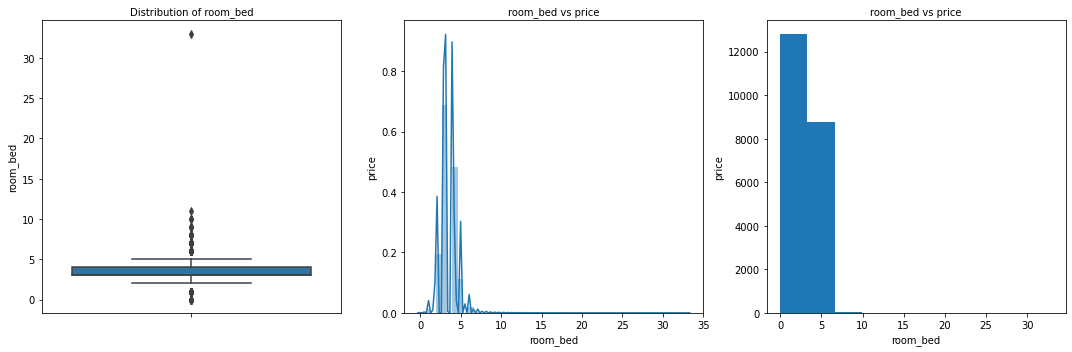

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='room_bed',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('room_bed', fontsize=10)
ax1.set_title('Distribution of room_bed', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['room_bed'],ax=ax2)
ax2.set_xlabel('room_bed', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('room_bed vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['room_bed'])
ax3.set_xlabel('room_bed', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('room_bed vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [25]:
# detecting outliers with visualization for Bathrooms
print('Range of values: ', Houseprice_df['room_bath'].max()-Houseprice_df['room_bath'].min())
print('Minimum no of baths: ', Houseprice_df['room_bath'].min())
print('Maximum no of baths: ',Houseprice_df['room_bath'].max())
print('Mean value: ', Houseprice_df['room_bath'].mean())
print('Median value: ',Houseprice_df['room_bath'].median())
print('Standard deviation: ', Houseprice_df['room_bath'].std())

Range of values:  8.0
Minimum no of baths:  0.0
Maximum no of baths:  8.0
Mean value:  2.1147573219821405
Median value:  2.25
Standard deviation:  0.7701631572177122


In [26]:
Q1=Houseprice_df['room_bath'].quantile(q=0.25)
Q3=Houseprice_df['room_bath'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['room_bath']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in room_bath: ', Lower_outliers)
print('Upper outliers in room_bath: ', Upper_outliers)

1st Quartile (Q1) is:  1.75
3st Quartile (Q3) is:  2.5
Interquartile range (IQR) is  0.75
Lower outliers in room_bath:  0.625
Upper outliers in room_bath:  3.625


In [27]:
print('No. of outliers in room_bath upper : ', Houseprice_df[Houseprice_df['room_bath']>3.62]['room_bath'].count())
print('No. of outliers in room_bath lower : ', Houseprice_df[Houseprice_df['room_bath']<0.62]['room_bath'].count())

No. of outliers in room_bath upper :  557
No. of outliers in room_bath lower :  14


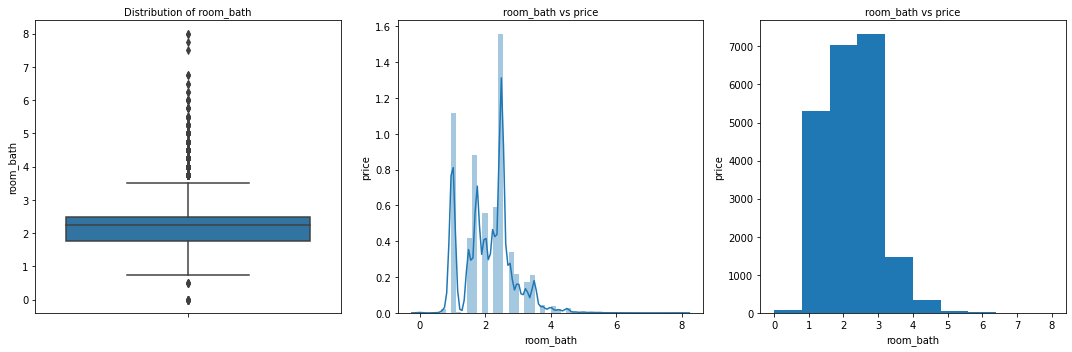

In [28]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='room_bath',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('room_bath', fontsize=10)
ax1.set_title('Distribution of room_bath', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['room_bath'],ax=ax2)
ax2.set_xlabel('room_bath', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('room_bath vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['room_bath'])
ax3.set_xlabel('room_bath', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('room_bath vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [29]:
# detecting outliers with visualization for square footage of the home
print('Range of values: ', Houseprice_df['living_measure'].max()-Houseprice_df['living_measure'].min())
print('Minimum no of living_measure: ', Houseprice_df['living_measure'].min())
print('Maximum no of living_measure: ',Houseprice_df['living_measure'].max())
print('Mean value: ', Houseprice_df['living_measure'].mean())
print('Median value: ',Houseprice_df['living_measure'].median())
print('Standard deviation: ', Houseprice_df['living_measure'].std())

Range of values:  13250
Minimum no of living_measure:  290
Maximum no of living_measure:  13540
Mean value:  2079.8997362698374
Median value:  1910.0
Standard deviation:  918.440897046811


In [30]:
Q1=Houseprice_df['living_measure'].quantile(q=0.25)
Q3=Houseprice_df['living_measure'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['living_measure']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in living_measure: ', Lower_outliers)
print('Upper outliers in living_measure: ', Upper_outliers)

1st Quartile (Q1) is:  1427.0
3st Quartile (Q3) is:  2550.0
Interquartile range (IQR) is  1123.0
Lower outliers in living_measure:  -257.5
Upper outliers in living_measure:  4234.5


In [31]:
print('No. of outliers in living_measure upper : ', Houseprice_df[Houseprice_df['living_measure']>4234.5]['living_measure'].count())
print('No. of outliers in living_measure lower : ', Houseprice_df[Houseprice_df['living_measure']<-257.5]['living_measure'].count())

No. of outliers in living_measure upper :  572
No. of outliers in living_measure lower :  0


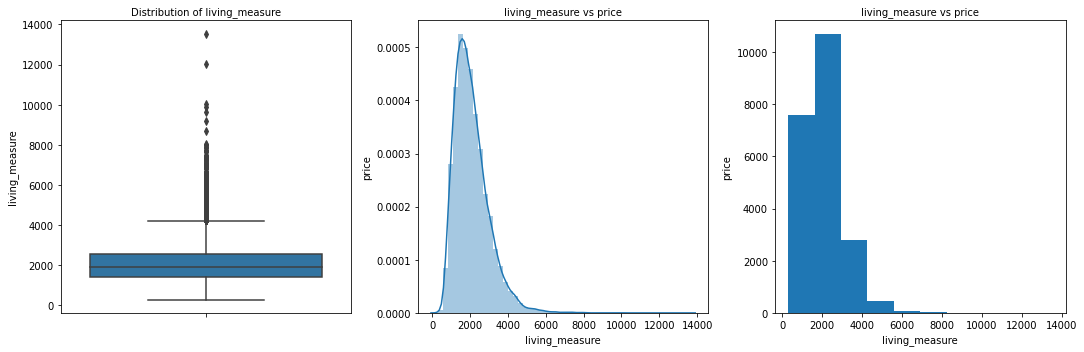

In [32]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='living_measure',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('living_measure', fontsize=10)
ax1.set_title('Distribution of living_measure', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['living_measure'],ax=ax2)
ax2.set_xlabel('living_measure', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('living_measure vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['living_measure'])
ax3.set_xlabel('living_measure', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('living_measure vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [33]:
# detecting outliers with visualization for square footage of the lot
print('Range of values: ', Houseprice_df['lot_measure'].max()-Houseprice_df['lot_measure'].min())
print('Minimum no of lot_measure: ', Houseprice_df['lot_measure'].min())
print('Maximum no of lot_measure: ',Houseprice_df['lot_measure'].max())
print('Mean value: ', Houseprice_df['lot_measure'].mean())
print('Median value: ',Houseprice_df['lot_measure'].median())
print('Standard deviation: ', Houseprice_df['lot_measure'].std())

Range of values:  1650839
Minimum no of lot_measure:  520
Maximum no of lot_measure:  1651359
Mean value:  15106.967565816869
Median value:  7618.0
Standard deviation:  41420.511515135375


In [34]:
Q1=Houseprice_df['lot_measure'].quantile(q=0.25)
Q3=Houseprice_df['lot_measure'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['lot_measure']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in lot_measure: ', Lower_outliers)
print('Upper outliers in lot_measure: ', Upper_outliers)

1st Quartile (Q1) is:  5040.0
3st Quartile (Q3) is:  10688.0
Interquartile range (IQR) is  5648.0
Lower outliers in lot_measure:  -3432.0
Upper outliers in lot_measure:  19160.0


In [35]:
print('No. of outliers in lot_measure upper : ', Houseprice_df[Houseprice_df['lot_measure']>19160.0]['lot_measure'].count())
print('No. of outliers in lot_measure lower : ', Houseprice_df[Houseprice_df['lot_measure']<-3432.0]['lot_measure'].count())

No. of outliers in lot_measure upper :  2425
No. of outliers in lot_measure lower :  0


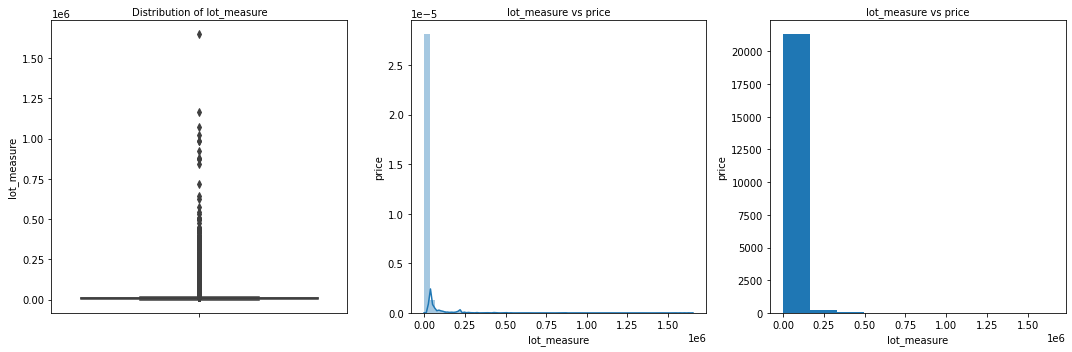

In [36]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='lot_measure',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('lot_measure', fontsize=10)
ax1.set_title('Distribution of lot_measure', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['lot_measure'],ax=ax2)
ax2.set_xlabel('lot_measure', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('lot_measure vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['lot_measure'])
ax3.set_xlabel('lot_measure', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('lot_measure vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [37]:
# detecting outliers with visualization for ceil
print('Range of values: ', Houseprice_df['ceil'].max()-Houseprice_df['ceil'].min())
print('Minimum no of ceil: ', Houseprice_df['ceil'].min())
print('Maximum no of ceil: ',Houseprice_df['ceil'].max())
print('Mean value: ', Houseprice_df['ceil'].mean())
print('Median value: ',Houseprice_df['ceil'].median())
print('Standard deviation: ', Houseprice_df['ceil'].std())

Range of values:  2.5
Minimum no of ceil:  1.0
Maximum no of ceil:  3.5
Mean value:  1.4943089807060566
Median value:  1.5
Standard deviation:  0.5399888951423827


In [38]:
Q1=Houseprice_df['ceil'].quantile(q=0.25)
Q3=Houseprice_df['ceil'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['ceil']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ceil: ', Lower_outliers)
print('Upper outliers in ceil: ', Upper_outliers)

1st Quartile (Q1) is:  1.0
3st Quartile (Q3) is:  2.0
Interquartile range (IQR) is  1.0
Lower outliers in ceil:  -0.5
Upper outliers in ceil:  3.5


In [39]:
print('No. of outliers in ceil upper : ', Houseprice_df[Houseprice_df['ceil']>3.5]['ceil'].count())
print('No. of outliers in ceil lower : ', Houseprice_df[Houseprice_df['ceil']<-0.5]['ceil'].count())

No. of outliers in ceil upper :  0
No. of outliers in ceil lower :  0


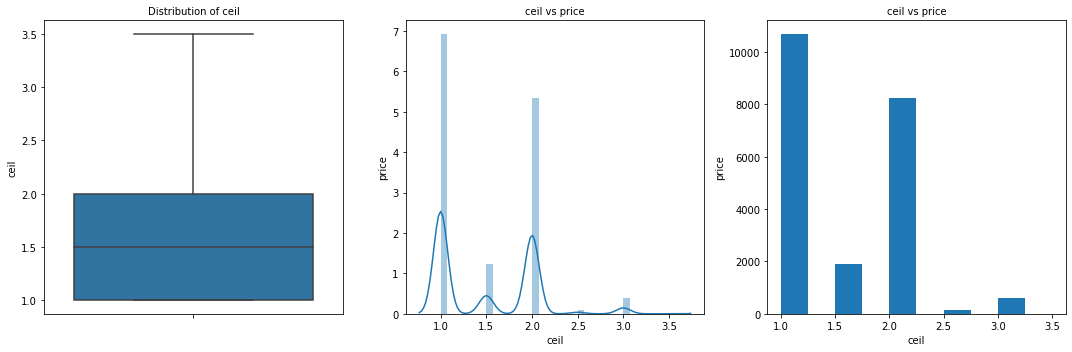

In [40]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='ceil',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('ceil', fontsize=10)
ax1.set_title('Distribution of ceil', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['ceil'],ax=ax2)
ax2.set_xlabel('ceil', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('ceil vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['ceil'])
ax3.set_xlabel('ceil', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('ceil vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [41]:
# detecting outliers with visualization for coast
print('Range of values: ', Houseprice_df['coast'].max()-Houseprice_df['coast'].min())
print('Minimum no of coast: ', Houseprice_df['coast'].min())
print('Maximum no of coast: ',Houseprice_df['coast'].max())
print('Mean value: ', Houseprice_df['coast'].mean())
print('Median value: ',Houseprice_df['coast'].median())
print('Standard deviation: ', Houseprice_df['coast'].std())

Range of values:  1
Minimum no of coast:  0
Maximum no of coast:  1
Mean value:  0.007541757275713691
Median value:  0.0
Standard deviation:  0.08651719772790364


In [42]:
Q1=Houseprice_df['coast'].quantile(q=0.25)
Q3=Houseprice_df['coast'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['coast']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coast: ', Lower_outliers)
print('Upper outliers in coast: ', Upper_outliers)

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  0.0
Interquartile range (IQR) is  0.0
Lower outliers in coast:  0.0
Upper outliers in coast:  0.0


In [43]:
print('No. of outliers in coast upper : ', Houseprice_df[Houseprice_df['coast']>0]['coast'].count())
print('No. of outliers in coast lower : ', Houseprice_df[Houseprice_df['coast']<0]['coast'].count())

No. of outliers in coast upper :  163
No. of outliers in coast lower :  0


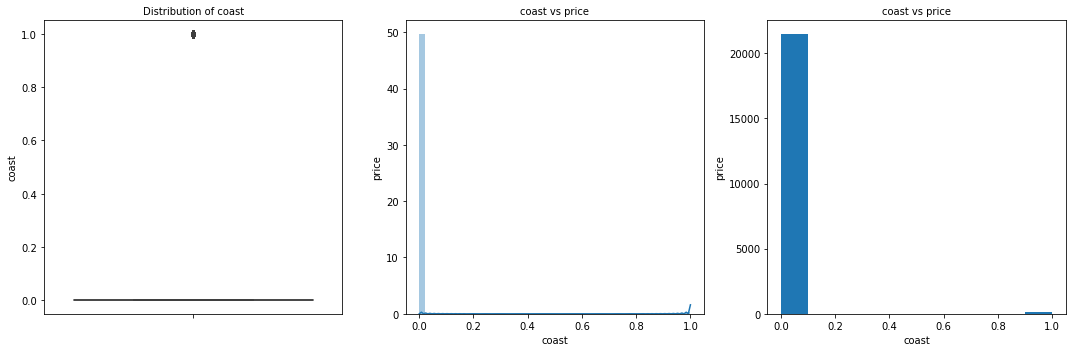

In [44]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='coast',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('coast', fontsize=10)
ax1.set_title('Distribution of coast', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['coast'],ax=ax2)
ax2.set_xlabel('coast', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('coast vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['coast'])
ax3.set_xlabel('coast', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('coast vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [45]:
# detecting outliers with visualization for sight
print('Range of values: ', Houseprice_df['sight'].max()-Houseprice_df['sight'].min())
print('Minimum no of sight: ', Houseprice_df['sight'].min())
print('Maximum no of sight: ',Houseprice_df['sight'].max())
print('Mean value: ', Houseprice_df['sight'].mean())
print('Median value: ',Houseprice_df['sight'].median())
print('Standard deviation: ', Houseprice_df['sight'].std())

Range of values:  4
Minimum no of sight:  0
Maximum no of sight:  4
Mean value:  0.23430342849211122
Median value:  0.0
Standard deviation:  0.7663175692736398


In [46]:
Q1=Houseprice_df['sight'].quantile(q=0.25)
Q3=Houseprice_df['sight'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['sight']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in sight: ', Lower_outliers)
print('Upper outliers in sight: ', Upper_outliers)

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  0.0
Interquartile range (IQR) is  0.0
Lower outliers in sight:  0.0
Upper outliers in sight:  0.0


In [47]:
print('No. of outliers in sight upper : ', Houseprice_df[Houseprice_df['sight']>0.0]['sight'].count())
print('No. of outliers in sight lower : ', Houseprice_df[Houseprice_df['sight']<0.0]['sight'].count())

No. of outliers in sight upper :  2124
No. of outliers in sight lower :  0


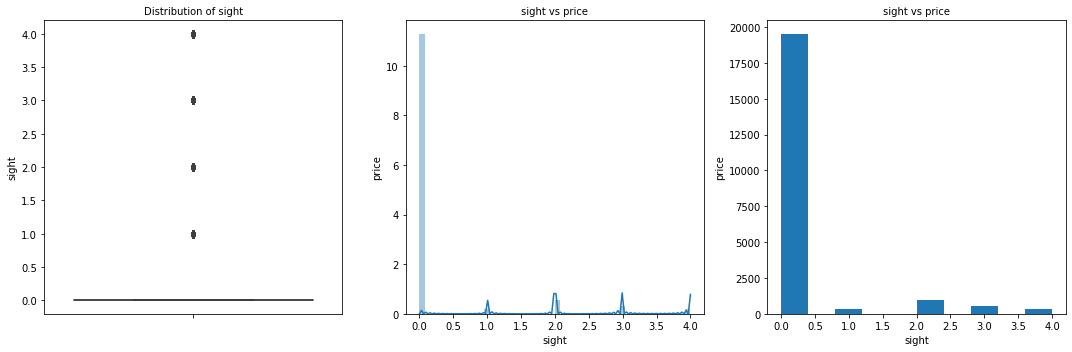

In [48]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='sight',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('sight', fontsize=10)
ax1.set_title('Distribution of sight', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['sight'],ax=ax2)
ax2.set_xlabel('sight', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('sight vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['sight'])
ax3.set_xlabel('sight', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('sight vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [49]:
# detecting outliers with visualization for condition
print('Range of values: ', Houseprice_df['condition'].max()-Houseprice_df['condition'].min())
print('Minimum no of condition: ', Houseprice_df['condition'].min())
print('Maximum no of condition: ',Houseprice_df['condition'].max())
print('Mean value: ', Houseprice_df['condition'].mean())
print('Median value: ',Houseprice_df['condition'].median())
print('Standard deviation: ', Houseprice_df['condition'].std())

Range of values:  4
Minimum no of condition:  1
Maximum no of condition:  5
Mean value:  3.4094295100171195
Median value:  3.0
Standard deviation:  0.650743046366255


In [50]:
Q1=Houseprice_df['condition'].quantile(q=0.25)
Q3=Houseprice_df['condition'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['condition']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in condition: ', Lower_outliers)
print('Upper outliers in condition: ', Upper_outliers)

1st Quartile (Q1) is:  3.0
3st Quartile (Q3) is:  4.0
Interquartile range (IQR) is  1.0
Lower outliers in condition:  1.5
Upper outliers in condition:  5.5


In [51]:
print('No. of outliers in condition upper : ', Houseprice_df[Houseprice_df['condition']>5.5]['condition'].count())
print('No. of outliers in condition lower : ', Houseprice_df[Houseprice_df['condition']<1.5]['condition'].count())

No. of outliers in condition upper :  0
No. of outliers in condition lower :  30


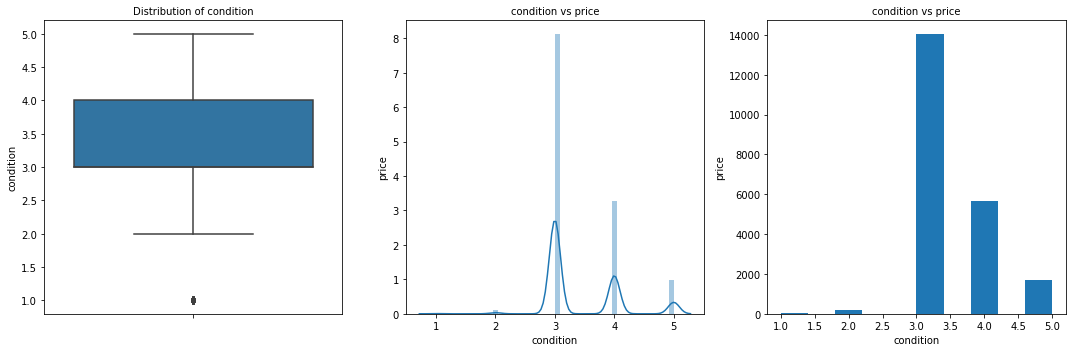

In [52]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='condition',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('condition', fontsize=10)
ax1.set_title('Distribution of condition', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['condition'],ax=ax2)
ax2.set_xlabel('condition', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('condition vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['condition'])
ax3.set_xlabel('condition', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('condition vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [53]:
# detecting outliers with visualization for quality
print('Range of values: ', Houseprice_df['quality'].max()-Houseprice_df['quality'].min())
print('Minimum no of quality: ', Houseprice_df['quality'].min())
print('Maximum no of quality: ',Houseprice_df['quality'].max())
print('Mean value: ', Houseprice_df['quality'].mean())
print('Median value: ',Houseprice_df['quality'].median())
print('Standard deviation: ', Houseprice_df['quality'].std())

Range of values:  12
Minimum no of quality:  1
Maximum no of quality:  13
Mean value:  7.656873178179799
Median value:  7.0
Standard deviation:  1.175458756974303


In [54]:
Q1=Houseprice_df['quality'].quantile(q=0.25)
Q3=Houseprice_df['quality'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['quality']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in quality: ', Lower_outliers)
print('Upper outliers in quality: ', Upper_outliers)

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  8.0
Interquartile range (IQR) is  1.0
Lower outliers in quality:  5.5
Upper outliers in quality:  9.5


In [55]:
print('No. of outliers in quality upper : ', Houseprice_df[Houseprice_df['quality']>9.5]['quality'].count())
print('No. of outliers in quality lower : ', Houseprice_df[Houseprice_df['quality']<5.5]['quality'].count())

No. of outliers in quality upper :  1636
No. of outliers in quality lower :  275


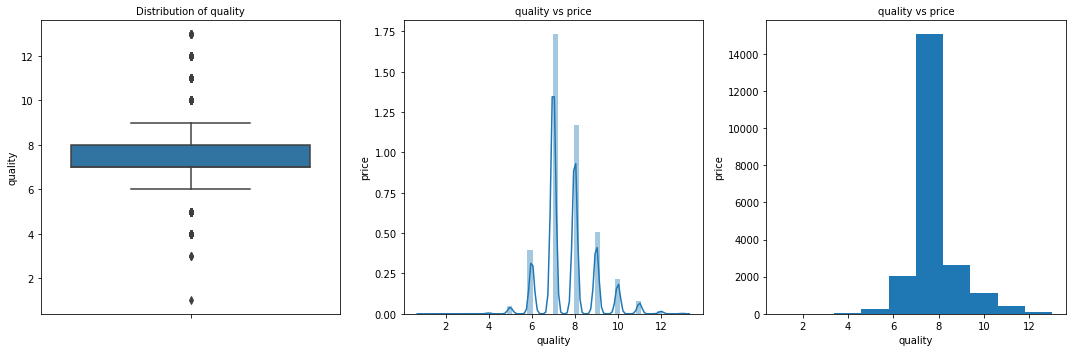

In [56]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='quality',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('quality', fontsize=10)
ax1.set_title('Distribution of quality', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['quality'],ax=ax2)
ax2.set_xlabel('quality', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('quality vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['quality'])
ax3.set_xlabel('quality', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('quality vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [57]:
# detecting outliers with visualization for ceil_measure
print('Range of values: ', Houseprice_df['ceil_measure'].max()-Houseprice_df['ceil_measure'].min())
print('Minimum no of ceil_measure: ', Houseprice_df['ceil_measure'].min())
print('Maximum no of ceil_measure: ',Houseprice_df['ceil_measure'].max())
print('Mean value: ', Houseprice_df['ceil_measure'].mean())
print('Median value: ',Houseprice_df['ceil_measure'].median())
print('Standard deviation: ', Houseprice_df['ceil_measure'].std())

Range of values:  9120
Minimum no of ceil_measure:  290
Maximum no of ceil_measure:  9410
Mean value:  1788.3906907879516
Median value:  1560.0
Standard deviation:  828.0909776519161


In [58]:
Q1=Houseprice_df['ceil_measure'].quantile(q=0.25)
Q3=Houseprice_df['ceil_measure'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['ceil_measure']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ceil_measure: ', Lower_outliers)
print('Upper outliers in ceil_measure: ', Upper_outliers)

1st Quartile (Q1) is:  1190.0
3st Quartile (Q3) is:  2210.0
Interquartile range (IQR) is  1020.0
Lower outliers in ceil_measure:  -340.0
Upper outliers in ceil_measure:  3740.0


In [59]:
print('No. of outliers in ceil_measure upper : ', Houseprice_df[Houseprice_df['ceil_measure']>3740.0]['ceil_measure'].count())
print('No. of outliers in ceil_measure lower : ', Houseprice_df[Houseprice_df['ceil_measure']<-340.0]['ceil_measure'].count())

No. of outliers in ceil_measure upper :  611
No. of outliers in ceil_measure lower :  0


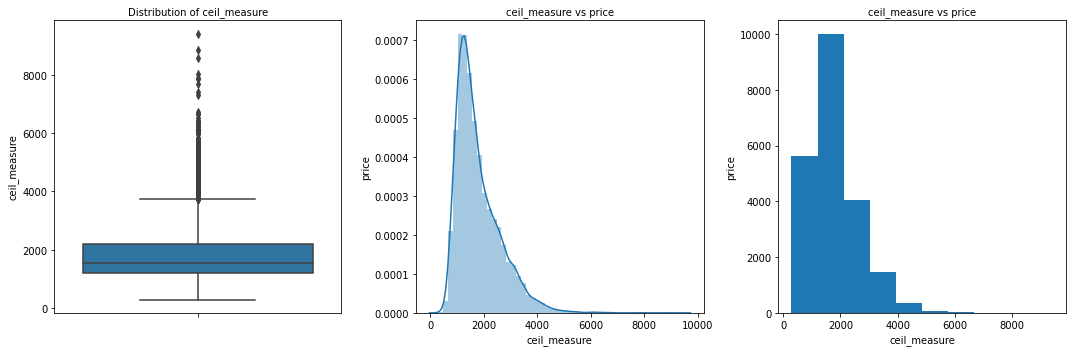

In [60]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='ceil_measure',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('ceil_measure', fontsize=10)
ax1.set_title('Distribution of ceil_measure', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['ceil_measure'],ax=ax2)
ax2.set_xlabel('ceil_measure', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('ceil_measure vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['ceil_measure'])
ax3.set_xlabel('ceil_measure', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('ceil_measure vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [61]:
# detecting outliers with visualization for latitude
print('Range of values: ', Houseprice_df['lat'].max()-Houseprice_df['lat'].min())
print('Minimum no of lat: ', Houseprice_df['lat'].min())
print('Maximum no of lat: ',Houseprice_df['lat'].max())
print('Mean value: ', Houseprice_df['lat'].mean())
print('Median value: ',Houseprice_df['lat'].median())
print('Standard deviation: ', Houseprice_df['lat'].std())

Range of values:  0.621699999999997
Minimum no of lat:  47.1559
Maximum no of lat:  47.7776
Mean value:  47.56005251931716
Median value:  47.5718
Standard deviation:  0.13856371024192418


In [62]:
Q1=Houseprice_df['lat'].quantile(q=0.25)
Q3=Houseprice_df['lat'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['lat']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in lat: ', Lower_outliers)
print('Upper outliers in lat: ', Upper_outliers)

1st Quartile (Q1) is:  47.471000000000004
3st Quartile (Q3) is:  47.678000000000004
Interquartile range (IQR) is  0.20700000000000074
Lower outliers in lat:  47.1605
Upper outliers in lat:  47.9885


In [63]:
print('No. of outliers in lat upper : ', Houseprice_df[Houseprice_df['lat']>47.9885]['lat'].count())
print('No. of outliers in lat lower : ', Houseprice_df[Houseprice_df['lat']<47.1605]['lat'].count())

No. of outliers in lat upper :  0
No. of outliers in lat lower :  2


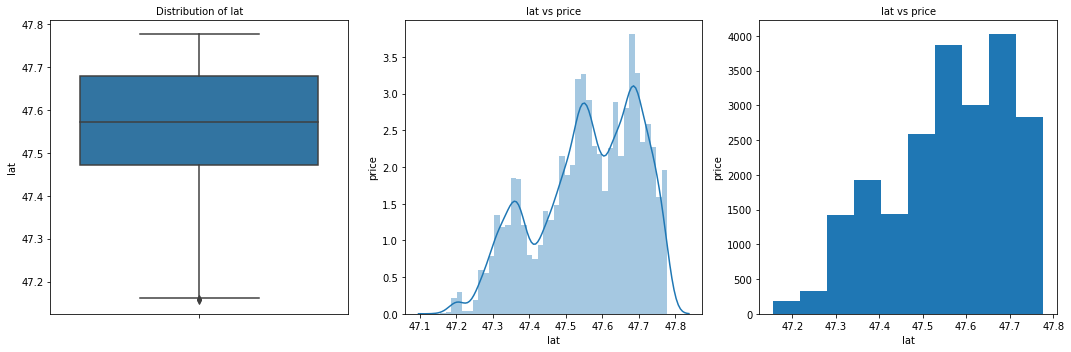

In [64]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='lat',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('lat', fontsize=10)
ax1.set_title('Distribution of lat', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['lat'],ax=ax2)
ax2.set_xlabel('lat', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('lat vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['lat'])
ax3.set_xlabel('lat', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('lat vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [65]:
# detecting outliers with visualization for longitude
print('Range of values: ', Houseprice_df['long'].max()-Houseprice_df['long'].min())
print('Minimum no of long : ', Houseprice_df['long'].min())
print('Maximum no of long : ',Houseprice_df['long'].max())
print('Mean value: ', Houseprice_df['long'].mean())
print('Median value: ',Houseprice_df['long'].median())
print('Standard deviation: ', Houseprice_df['long'].std())

Range of values:  1.2039999999999935
Minimum no of long :  -122.51899999999999
Maximum no of long :  -121.315
Mean value:  -122.21389640494166
Median value:  -122.23
Standard deviation:  0.14082834238139214


In [66]:
Q1=Houseprice_df['long'].quantile(q=0.25)
Q3=Houseprice_df['long'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['long']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in long: ', Lower_outliers)
print('Upper outliers in long: ', Upper_outliers)

1st Quartile (Q1) is:  -122.32799999999999
3st Quartile (Q3) is:  -122.125
Interquartile range (IQR) is  0.20299999999998875
Lower outliers in long:  -122.63249999999996
Upper outliers in long:  -121.82050000000001


In [67]:
print('No. of outliers in long upper : ', Houseprice_df[Houseprice_df['long']>-121.82]['long'].count())
print('No. of outliers in long lower : ', Houseprice_df[Houseprice_df['long']<-122.63]['long'].count())

No. of outliers in long upper :  255
No. of outliers in long lower :  0


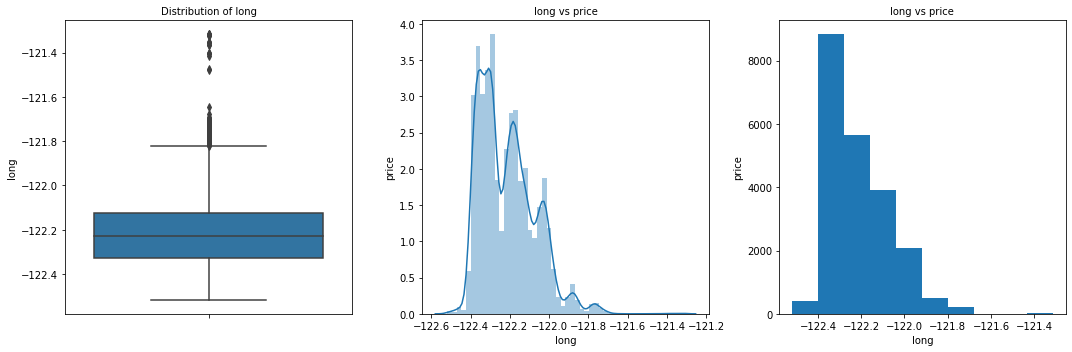

In [68]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='long',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('long', fontsize=10)
ax1.set_title('Distribution of long', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['long'],ax=ax2)
ax2.set_xlabel('long', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('long vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['long'])
ax3.set_xlabel('long', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('long vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [69]:
# detecting outliers with visualization for Living room area
print('Range of values: ', Houseprice_df['living_measure15'].max()-Houseprice_df['living_measure15'].min())
print('Minimum no of living_measure15: ', Houseprice_df['living_measure15'].min())
print('Maximum no of living_measure15: ',Houseprice_df['living_measure15'].max())
print('Mean value: ', Houseprice_df['living_measure15'].mean())
print('Median value: ',Houseprice_df['living_measure15'].median())
print('Standard deviation: ', Houseprice_df['living_measure15'].std())

Range of values:  5811
Minimum no of living_measure15:  399
Maximum no of living_measure15:  6210
Mean value:  1986.552491556008
Median value:  1840.0
Standard deviation:  685.3913042527774


In [70]:
Q1=Houseprice_df['living_measure15'].quantile(q=0.25)
Q3=Houseprice_df['living_measure15'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['living_measure15']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in living_measure15: ', Lower_outliers)
print('Upper outliers in living_measure15: ', Upper_outliers)

1st Quartile (Q1) is:  1490.0
3st Quartile (Q3) is:  2360.0
Interquartile range (IQR) is  870.0
Lower outliers in living_measure15:  185.0
Upper outliers in living_measure15:  3665.0


In [71]:
print('No. of outliers in living_measure15 upper : ', Houseprice_df[Houseprice_df['living_measure15']>3665.0]['living_measure15'].count())
print('No. of outliers in living_measure15 lower : ', Houseprice_df[Houseprice_df['living_measure15']<185.0]['living_measure15'].count())

No. of outliers in living_measure15 upper :  544
No. of outliers in living_measure15 lower :  0


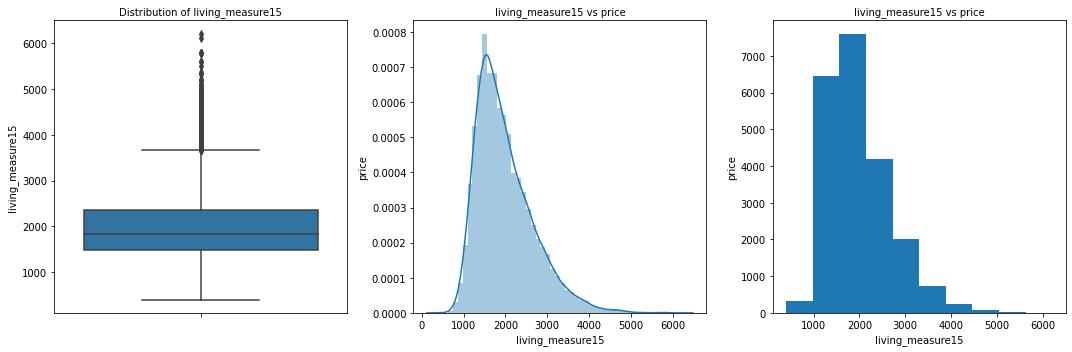

In [72]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='living_measure15',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('living_measure15', fontsize=10)
ax1.set_title('Distribution of living_measure15', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['living_measure15'],ax=ax2)
ax2.set_xlabel('living_measure15', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('living_measure15 vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['living_measure15'])
ax3.set_xlabel('living_measure15', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('living_measure15 vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [73]:
# detecting outliers with visualization for lotSize area
print('Range of values: ', Houseprice_df['lot_measure15'].max()-Houseprice_df['lot_measure15'].min())
print('Minimum no of lot_measure15: ', Houseprice_df['lot_measure15'].min())
print('Maximum no of lot_measure15: ',Houseprice_df['lot_measure15'].max())
print('Mean value: ', Houseprice_df['lot_measure15'].mean())
print('Median value: ',Houseprice_df['lot_measure15'].median())
print('Standard deviation: ', Houseprice_df['lot_measure15'].std())

Range of values:  870549
Minimum no of lot_measure15:  651
Maximum no of lot_measure15:  871200
Mean value:  12768.455651691113
Median value:  7620.0
Standard deviation:  27304.179631338604


In [74]:
Q1=Houseprice_df['lot_measure15'].quantile(q=0.25)
Q3=Houseprice_df['lot_measure15'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['lot_measure15']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in lot_measure15: ', Lower_outliers)
print('Upper outliers in lot_measure15: ', Upper_outliers)

1st Quartile (Q1) is:  5100.0
3st Quartile (Q3) is:  10083.0
Interquartile range (IQR) is  4983.0
Lower outliers in lot_measure15:  -2374.5
Upper outliers in lot_measure15:  17557.5


In [75]:
print('No. of outliers in lot_measure15 upper : ', Houseprice_df[Houseprice_df['lot_measure15']>17557.5]['lot_measure15'].count())
print('No. of outliers in lot_measure15 lower : ', Houseprice_df[Houseprice_df['lot_measure15']<-2374.5]['lot_measure15'].count())

No. of outliers in lot_measure15 upper :  2194
No. of outliers in lot_measure15 lower :  0


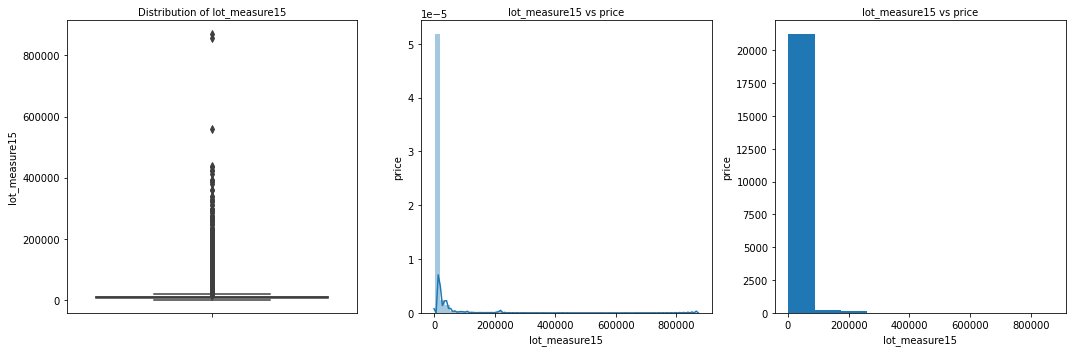

In [76]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='lot_measure15',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('lot_measure15', fontsize=10)
ax1.set_title('Distribution of lot_measure15', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['lot_measure15'],ax=ax2)
ax2.set_xlabel('lot_measure15', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('lot_measure15 vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['lot_measure15'])
ax3.set_xlabel('lot_measure15', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('lot_measure15 vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [77]:
# detecting outliers with visualization for furnished
print('Range of values: ', Houseprice_df['furnished'].max()-Houseprice_df['furnished'].min())
print('Minimum no of furnished: ', Houseprice_df['furnished'].min())
print('Maximum no of furnished: ',Houseprice_df['furnished'].max())
print('Mean value: ', Houseprice_df['furnished'].mean())
print('Median value: ',Houseprice_df['furnished'].median())
print('Standard deviation: ', Houseprice_df['furnished'].std())

Range of values:  1
Minimum no of furnished:  0
Maximum no of furnished:  1
Mean value:  0.19668717901263127
Median value:  0.0
Standard deviation:  0.3975030106045284


In [78]:
Q1=Houseprice_df['furnished'].quantile(q=0.25)
Q3=Houseprice_df['furnished'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['furnished']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in furnished: ', Lower_outliers)
print('Upper outliers in furnished: ', Upper_outliers)

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  0.0
Interquartile range (IQR) is  0.0
Lower outliers in furnished:  0.0
Upper outliers in furnished:  0.0


In [79]:
print('No. of outliers in furnished upper : ', Houseprice_df[Houseprice_df['furnished']>0]['furnished'].count())
print('No. of outliers in furnished lower : ', Houseprice_df[Houseprice_df['furnished']<0]['furnished'].count())

No. of outliers in furnished upper :  4251
No. of outliers in furnished lower :  0


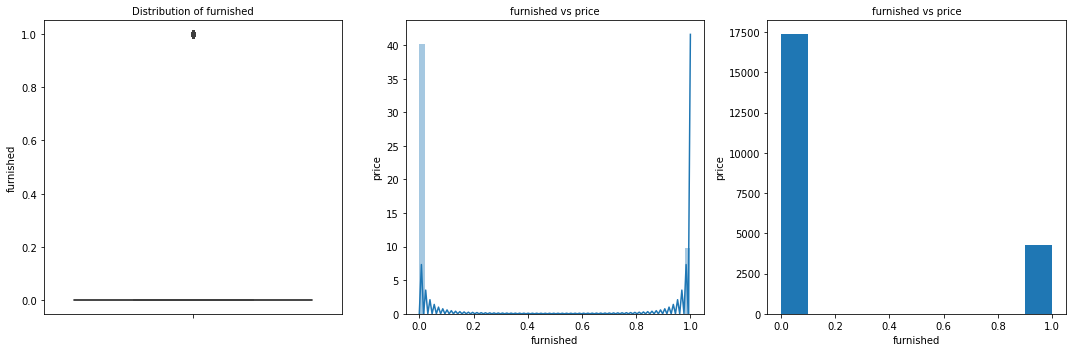

In [80]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='furnished',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('furnished', fontsize=10)
ax1.set_title('Distribution of furnished', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['furnished'],ax=ax2)
ax2.set_xlabel('furnished', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('furnished vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['furnished'])
ax3.set_xlabel('furnished', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('furnished vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [81]:
# detecting outliers with visualization for total area
print('Range of values: ', Houseprice_df['total_area'].max()-Houseprice_df['total_area'].min())
print('Minimum no of total_area: ', Houseprice_df['total_area'].min())
print('Maximum no of total_area: ',Houseprice_df['total_area'].max())
print('Mean value: ', Houseprice_df['total_area'].mean())
print('Median value: ',Houseprice_df['total_area'].median())
print('Standard deviation: ', Houseprice_df['total_area'].std())

Range of values:  1651236
Minimum no of total_area:  1423
Maximum no of total_area:  1652659
Mean value:  17186.867302086706
Median value:  9575.0
Standard deviation:  41589.08121511556


In [82]:
Q1=Houseprice_df['total_area'].quantile(q=0.25)
Q3=Houseprice_df['total_area'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['total_area']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in total_area: ', Lower_outliers)
print('Upper outliers in total_area: ', Upper_outliers)

1st Quartile (Q1) is:  7035.0
3st Quartile (Q3) is:  13000.0
Interquartile range (IQR) is  5965.0
Lower outliers in total_area:  -1912.5
Upper outliers in total_area:  21947.5


In [83]:
print('No. of outliers in total_area upper : ', Houseprice_df[Houseprice_df['total_area']>21947.5]['total_area'].count())
print('No. of outliers in total_area lower : ', Houseprice_df[Houseprice_df['total_area']<-1912.5]['total_area'].count())

No. of outliers in total_area upper :  2419
No. of outliers in total_area lower :  0


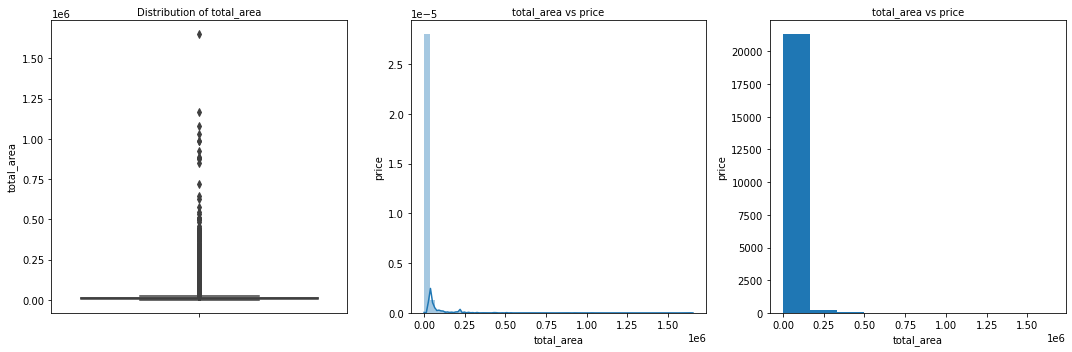

In [84]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='total_area',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('total_area', fontsize=10)
ax1.set_title('Distribution of total_area', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['total_area'],ax=ax2)
ax2.set_xlabel('total_area', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('total_area vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['total_area'])
ax3.set_xlabel('total_area', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('total_area vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

In [85]:
# detecting outliers with visualization for basement
print('Range of values: ', Houseprice_df['basement'].max()-Houseprice_df['basement'].min())
print('Minimum no of basement: ', Houseprice_df['basement'].min())
print('Maximum no of basement: ',Houseprice_df['basement'].max())
print('Mean value: ', Houseprice_df['basement'].mean())
print('Median value: ',Houseprice_df['basement'].median())
print('Standard deviation: ', Houseprice_df['basement'].std())

Range of values:  4820
Minimum no of basement:  0
Maximum no of basement:  4820
Mean value:  291.5090454818859
Median value:  0.0
Standard deviation:  442.57504267744383


In [86]:
Q1=Houseprice_df['basement'].quantile(q=0.25)
Q3=Houseprice_df['basement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(Houseprice_df['basement']))
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in basement: ', Lower_outliers)
print('Upper outliers in basement: ', Upper_outliers)

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  560.0
Interquartile range (IQR) is  560.0
Lower outliers in basement:  -840.0
Upper outliers in basement:  1400.0


In [87]:
print('No. of outliers in basement upper : ', Houseprice_df[Houseprice_df['basement']>1400.0]['basement'].count())
print('No. of outliers in basement lower : ', Houseprice_df[Houseprice_df['basement']<-840.0]['basement'].count())

No. of outliers in basement upper :  496
No. of outliers in basement lower :  0


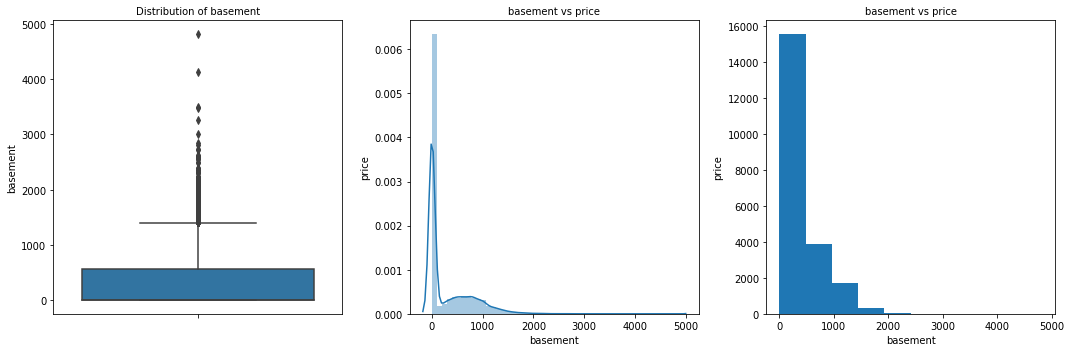

In [88]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='basement',data=Houseprice_df,orient='v',ax=ax1)
ax1.set_ylabel('basement', fontsize=10)
ax1.set_title('Distribution of basement', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(Houseprice_df['basement'],ax=ax2)
ax2.set_xlabel('basement', fontsize=10)
ax2.set_ylabel('price', fontsize=10)
ax2.set_title('basement vs price', fontsize=10)
ax2.tick_params(labelsize=10)

ax3.hist(Houseprice_df['basement'])
ax3.set_xlabel('basement', fontsize=10)
ax3.set_ylabel('price', fontsize=10)
ax3.set_title('basement vs price', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.7)
plt.tight_layout()

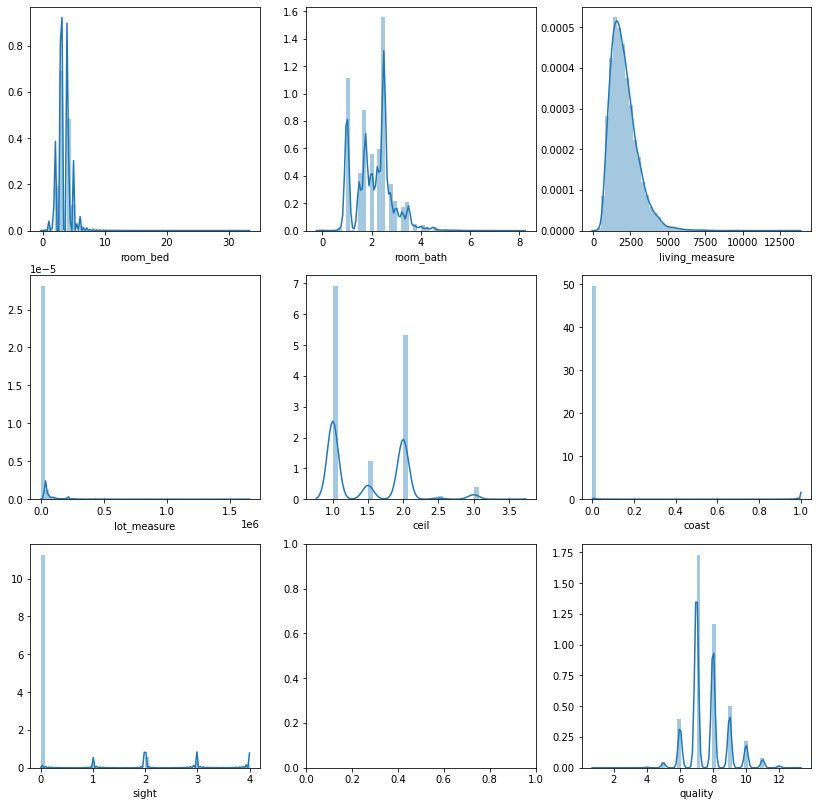

In [89]:
#multivariate analysis
fig, ax2 = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(Houseprice_df['room_bed'],ax=ax2[0][0])
sns.distplot(Houseprice_df['room_bath'],ax=ax2[0][1])
sns.distplot(Houseprice_df['living_measure'],ax=ax2[0][2])
sns.distplot(Houseprice_df['lot_measure'],ax=ax2[1][0])
sns.distplot(Houseprice_df['ceil'],ax=ax2[1][1])
sns.distplot(Houseprice_df['coast'],ax=ax2[1][2])
sns.distplot(Houseprice_df['sight'],ax=ax2[2][0])
sns.distplot(Houseprice_df['quality'],ax=ax2[2][2])

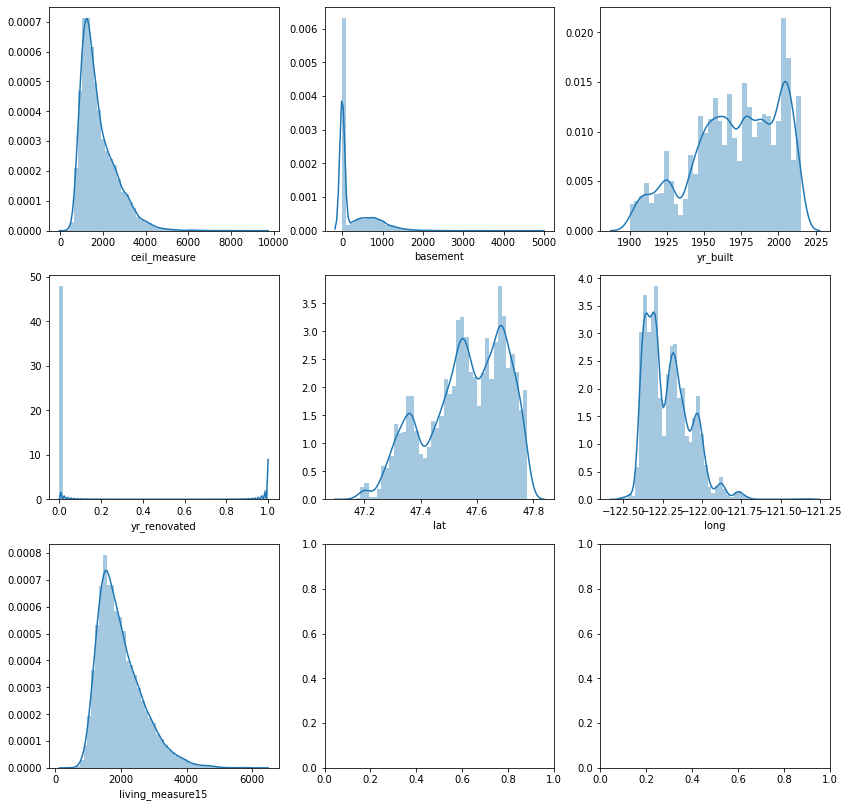

In [90]:
#distance plots for multivariate analysis
fig, ax2 = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(Houseprice_df['ceil_measure'],ax=ax2[0][0])
sns.distplot(Houseprice_df['basement'],ax=ax2[0][1])
sns.distplot(Houseprice_df['yr_built'],ax=ax2[0][2])
sns.distplot(Houseprice_df['yr_renovated'],ax=ax2[1][0])
sns.distplot(Houseprice_df['lat'],ax=ax2[1][1])
sns.distplot(Houseprice_df['long'],ax=ax2[1][2])
sns.distplot(Houseprice_df['living_measure15'],ax=ax2[2][0])

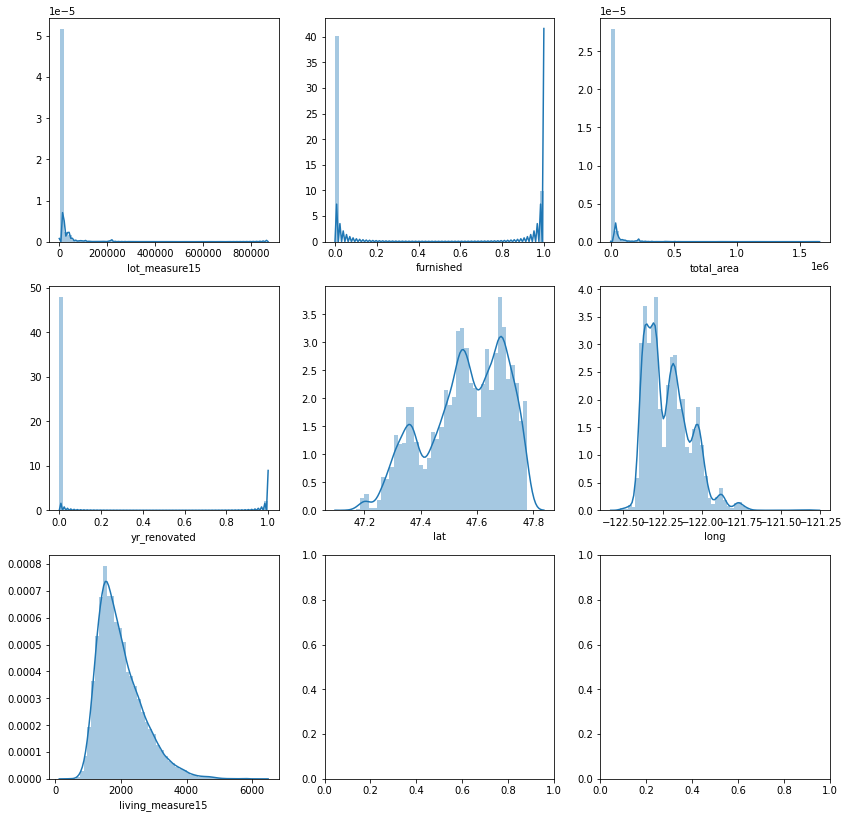

In [91]:
#distance plots for multivariate analysis
fig, ax2 = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(Houseprice_df['lot_measure15'],ax=ax2[0][0])
sns.distplot(Houseprice_df['furnished'],ax=ax2[0][1])
sns.distplot(Houseprice_df['total_area'],ax=ax2[0][2])
sns.distplot(Houseprice_df['yr_renovated'],ax=ax2[1][0])
sns.distplot(Houseprice_df['lat'],ax=ax2[1][1])
sns.distplot(Houseprice_df['long'],ax=ax2[1][2])
sns.distplot(Houseprice_df['living_measure15'],ax=ax2[2][0])

Text(0.5, 1.0, 'price vs total area')

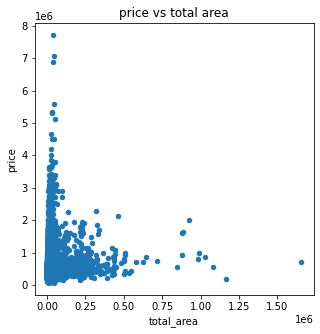

In [92]:
#scatter plot b/w price and total area
Houseprice_df.plot.scatter(x='total_area',y='price',figsize=(5,5))
plt.title("price vs total area")

Text(0.5, 1.0, 'price vs year built')

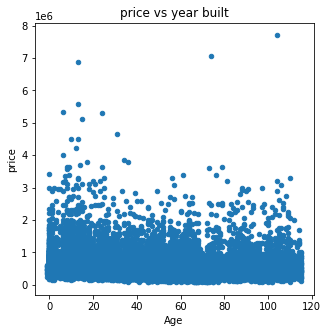

In [93]:
#scatter plot b/w price and year built
Houseprice_df.plot.scatter(x='Age',y='price',figsize=(5,5))
plt.title("price vs year built")

Text(0.5, 1.0, 'price vs year renovated')

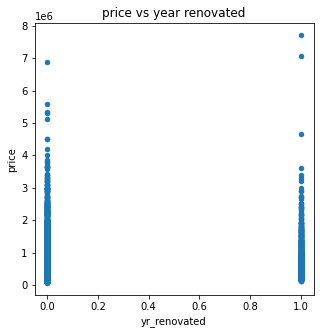

In [94]:
#scatter plot b/w price and year renovated
Houseprice_df.plot.scatter(x='yr_renovated',y='price',figsize=(5,5))
plt.title("price vs year renovated")

Text(0.5, 1.0, 'price vs living measure ')

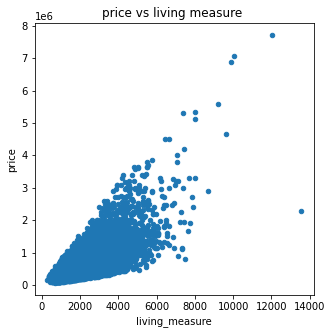

In [95]:
#scatter plot b/w price and living measure
Houseprice_df.plot.scatter(x='living_measure',y='price',figsize=(5,5))
plt.title("price vs living measure ")

Text(0.5, 1.0, 'price vs latitude')

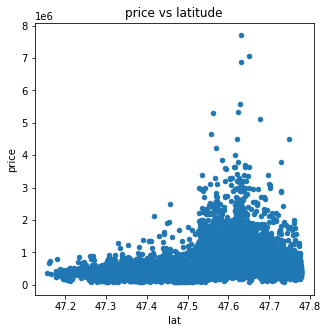

In [96]:
#scatter plot b/w price and latitude
Houseprice_df.plot.scatter(x='lat',y='price',figsize=(5,5))
plt.title("price vs latitude")

Text(0.5, 1.0, 'price vs longitude')

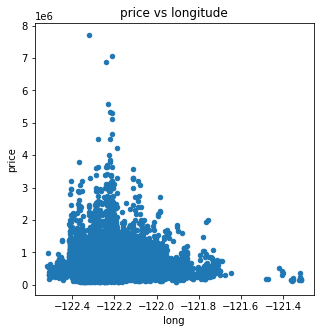

In [97]:
#scatter plot b/w price and longitude
Houseprice_df.plot.scatter(x='long',y='price',figsize=(5,5))
plt.title("price vs longitude")

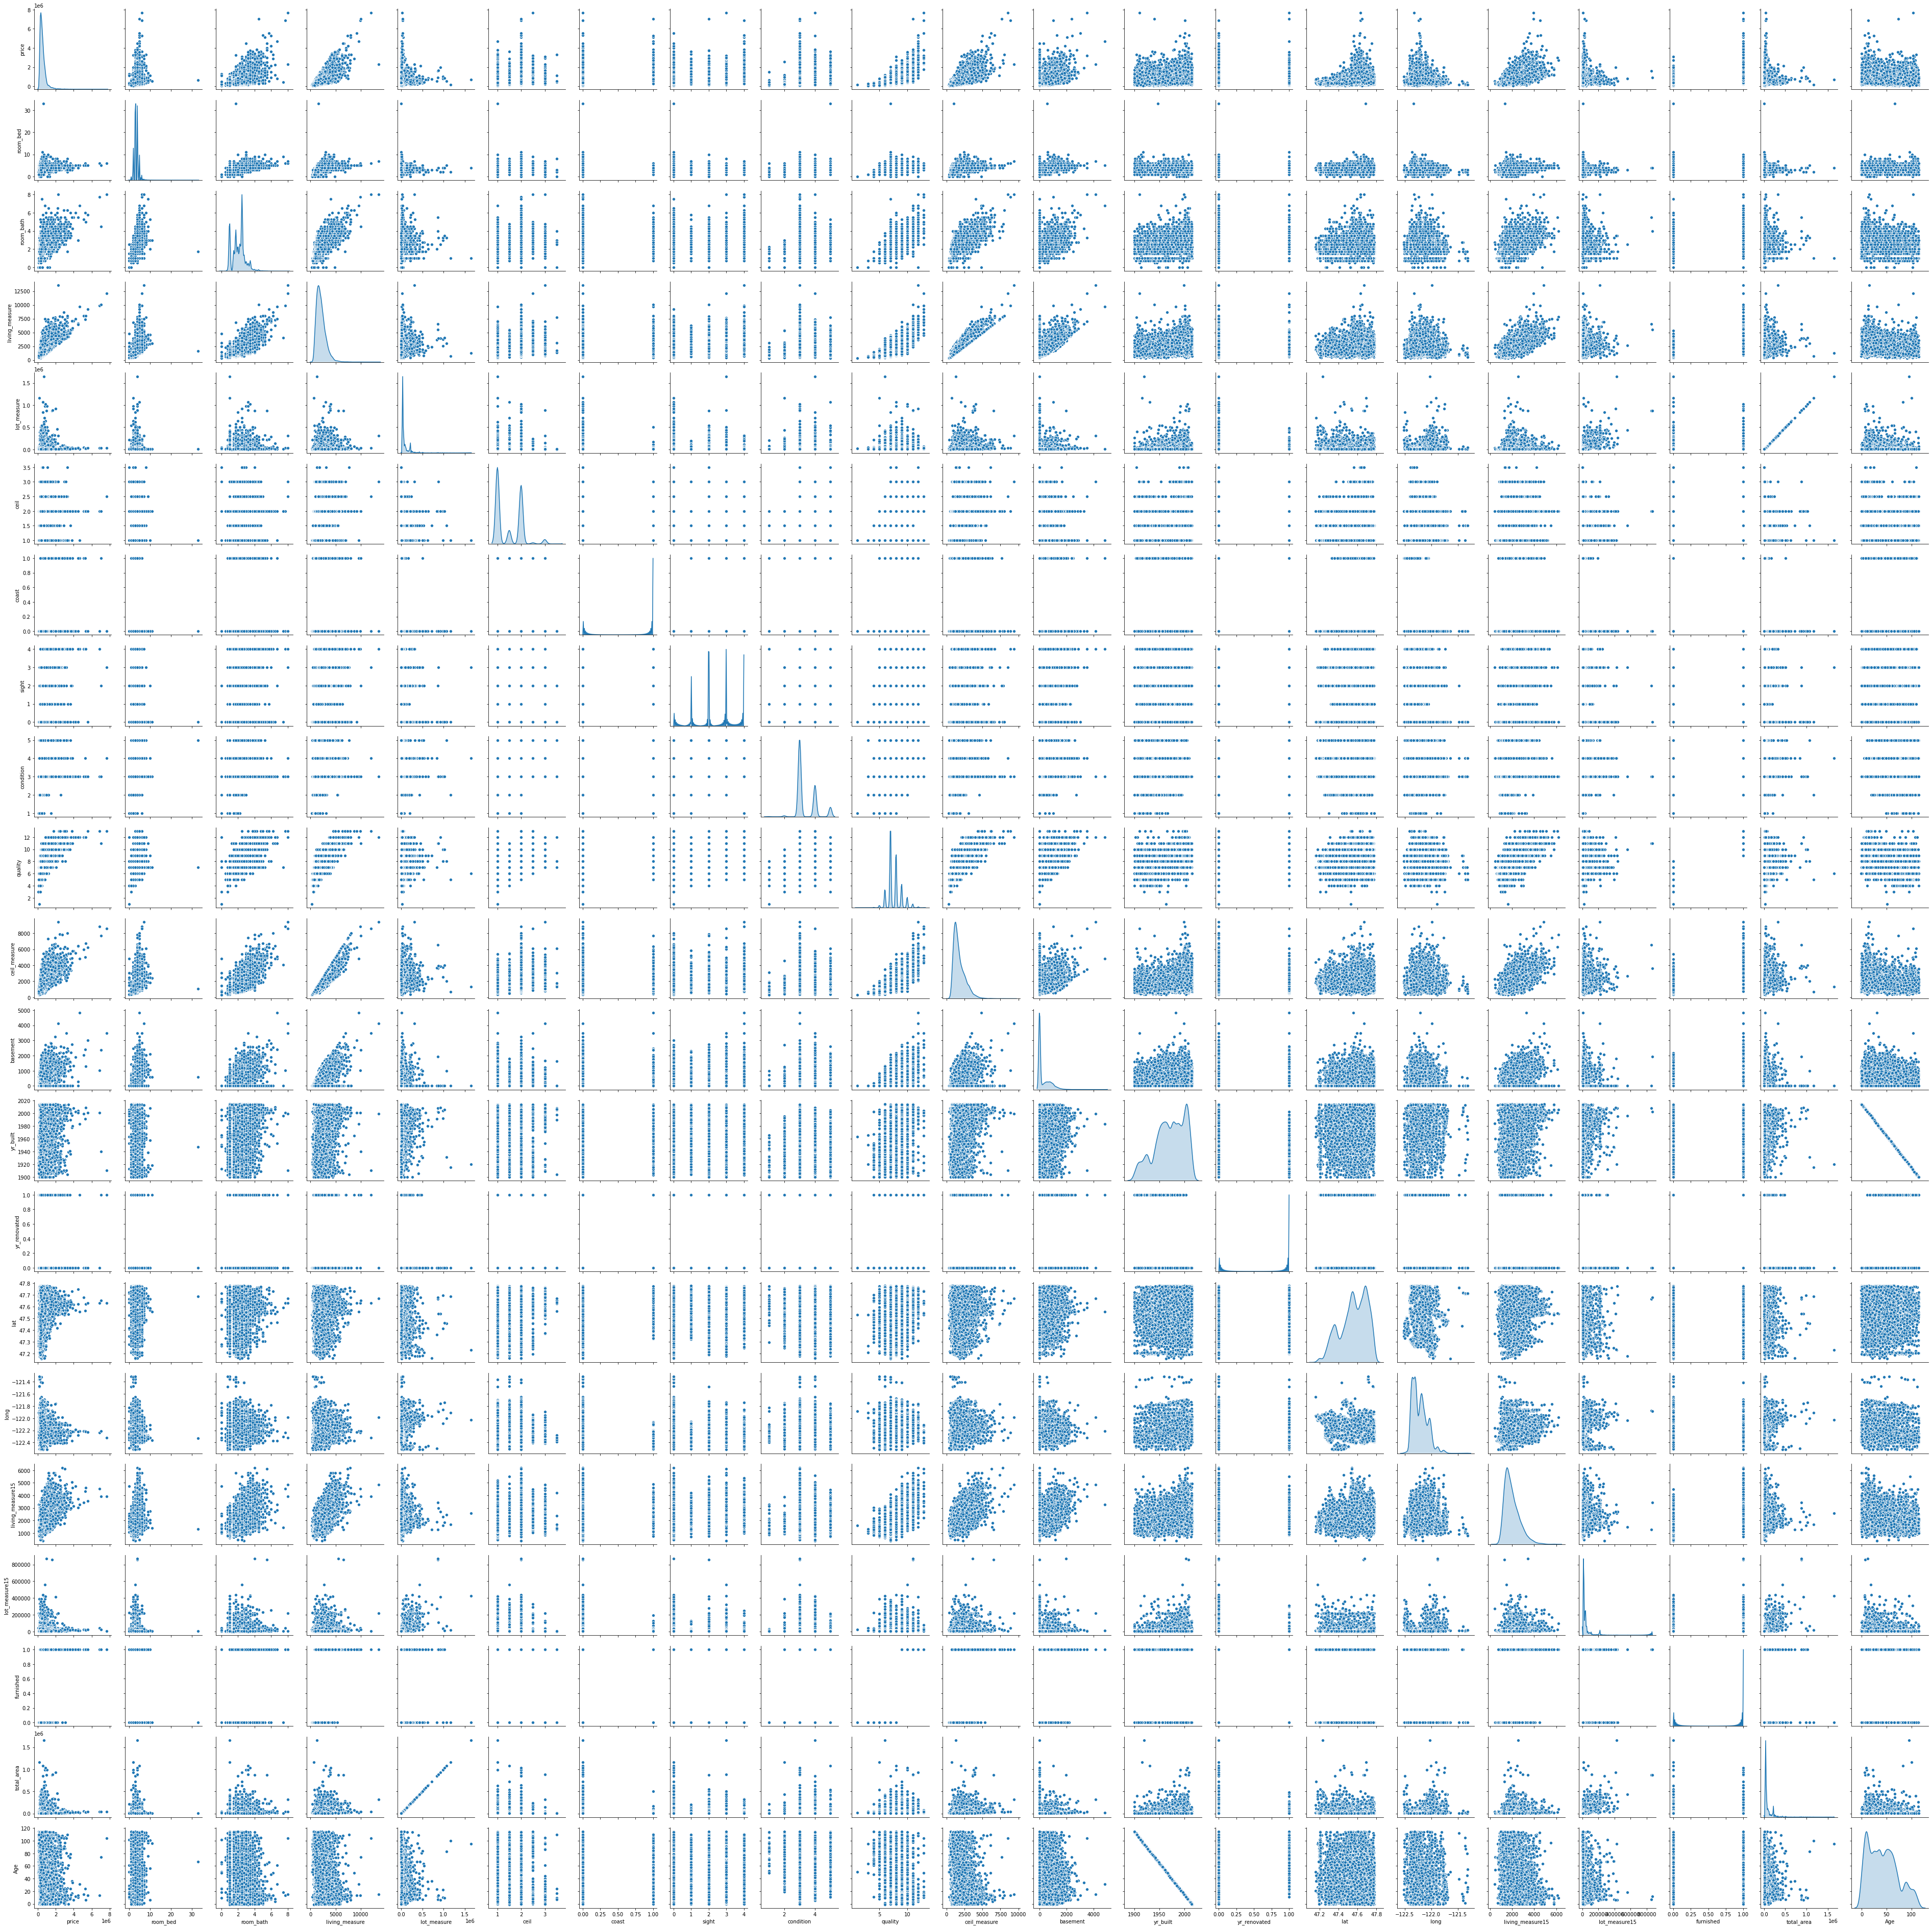

In [98]:
sns.pairplot(Houseprice_df, diag_kind='kde')

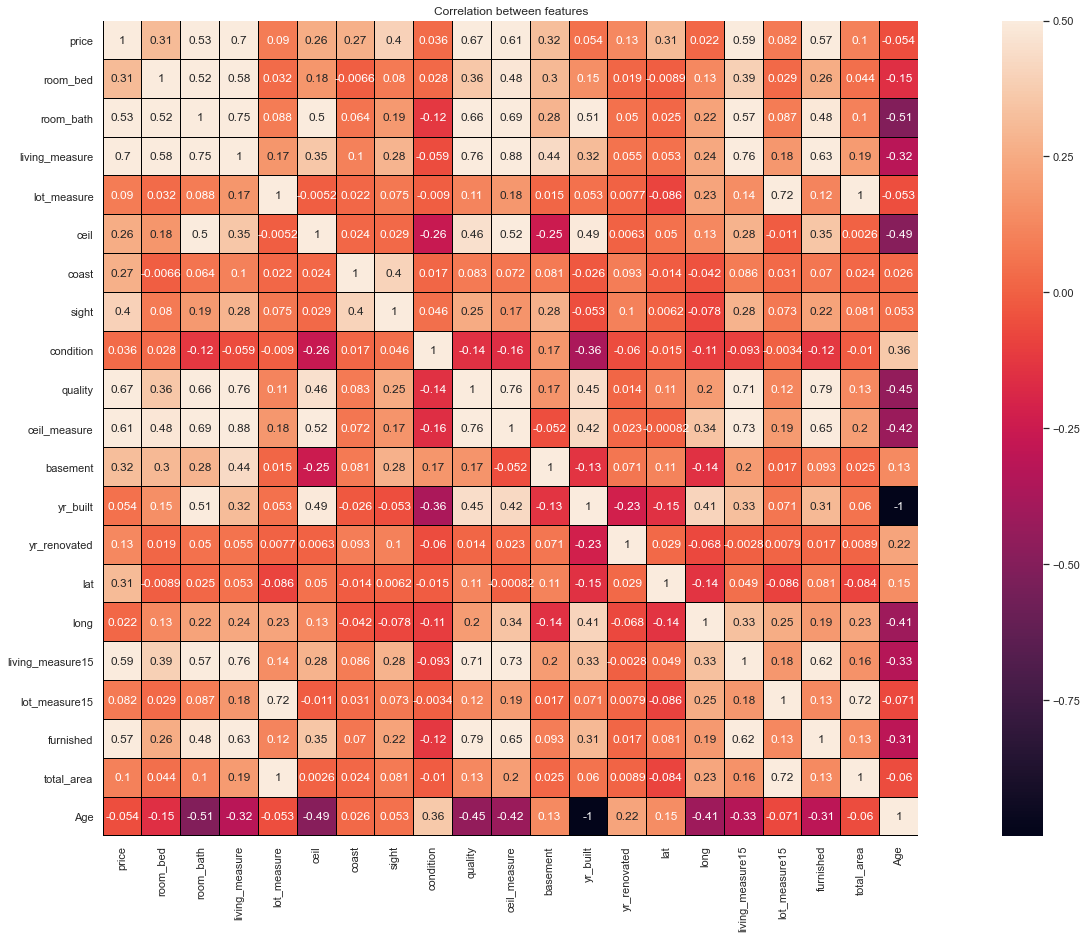

In [99]:
#heatmap
sns.set(font_scale=1)
plt.figure(figsize=(30, 15))

sns.heatmap(corr, vmax=.5, linewidths=0.01,
            square=True,annot=True,linecolor="black")
plt.title('Correlation between features');

In [100]:
# copying the dataset before removing outliers
Houseprice_df1=Houseprice_df.copy()

In [101]:
Houseprice_df1.dtypes

price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
Age                   int64
dtype: object

In [102]:
Houseprice_df1.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100         4       3.25            3020        13457   1.0      0   
1  277500         4       2.50            2550         7500   1.0      0   
2  404000         3       2.50            2370         4324   2.0      0   
3  300000         2       1.00             820         3844   1.0      0   
4  699000         2       1.50            1400         4050   1.0      0   

   sight  condition  quality  ...  basement  yr_built  yr_renovated      lat  \
0      0          5        9  ...         0      1956             0  47.7174   
1      0          3        8  ...       800      1976             0  47.3165   
2      0          3        8  ...         0      2006             0  47.3515   
3      0          4        6  ...         0      1916             0  47.7049   
4      0          4        8  ...         0      1954             0  47.6768   

      long  living_measure15  lot_measure15  furnished  total_area  Age  
0 -122.336              2120           7553          1       16477   58  
1 -122.386              2260           8800          0       10050   38  
2 -121.999              2370           4348          0        6694    9  
3 -122.349              1520           3844          0        4664   98  
4 -122.269              1900           5940          0        5450   61  

[5 rows x 21 columns]

In [103]:
# dealing with missing data
total = Houseprice_df1.isnull().sum().sort_values(ascending=False)
percent = (Houseprice_df1.isnull().sum()/Houseprice_df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
Age                   0      0.0
quality               0      0.0
room_bed              0      0.0
room_bath             0      0.0
living_measure        0      0.0
lot_measure           0      0.0
ceil                  0      0.0
coast                 0      0.0
sight                 0      0.0
condition             0      0.0
ceil_measure          0      0.0
total_area            0      0.0
basement              0      0.0
yr_built              0      0.0
yr_renovated          0      0.0
lat                   0      0.0
long                  0      0.0
living_measure15      0      0.0
lot_measure15         0      0.0
furnished             0      0.0

In [104]:
#used Z-score function to detect the outliers
z = np.abs(stats.zscore(Houseprice_df1))
print(z)

[[0.72931841 0.67648506 1.47406291 ... 2.0209442  0.01706899 0.49982214]
 [0.71506598 0.67648506 0.50022075 ... 0.49481821 0.17160832 0.18103325]
 [0.37071124 0.39873715 0.50022075 ... 0.49481821 0.25230445 1.16827357]
 ...
 [0.15442652 0.67648506 0.8248348  ... 0.49481821 0.21327888 1.4746585 ]
 [0.47687595 1.47395936 0.14900736 ... 0.49481821 0.01795867 0.48741818]
 [0.50423377 0.39873715 1.44746357 ... 0.49481821 0.24754347 0.7721643 ]]


In [105]:
#The first array contains the list of row numbers
#second array respective column numbers, which mean z[13][13] have a Z-score higher than 3.
threshold = 3
print(np.where(z > 3))

(array([   13,    14,    20, ..., 21590, 21590, 21610], dtype=int64), array([13, 11, 13, ..., 17, 19, 15], dtype=int64))


In [106]:
#its an outlier where threshold greater than 3
print(z[13][13])

4.758845271186958


In [107]:
#IQR of each column
Q1 = Houseprice_df1.quantile(0.25)
Q3 = Houseprice_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price               323050.000
room_bed                 1.000
room_bath                0.750
living_measure        1123.000
lot_measure           5648.000
ceil                     1.000
coast                    0.000
sight                    0.000
condition                1.000
quality                  1.000
ceil_measure          1020.000
basement               560.000
yr_built                46.000
yr_renovated             0.000
lat                      0.207
long                     0.203
living_measure15       870.000
lot_measure15         4983.000
furnished                0.000
total_area            5965.000
Age                     45.000
dtype: float64


In [108]:
#False indicates the value is valid and true indicates the presence of outlier
#print(Houseprice_df1 < (Q1 - 1.5 * IQR))&(Houseprice_df1 > (Q3 + 1.5 * IQR))

In [109]:
#dropping outliers
Houseprice_df1=Houseprice_df1[(z<3).all(axis=1)]

In [110]:
# The shape data before outlier removal
Houseprice_df.shape

(21613, 21)

In [111]:
#The shape of data after outlier removal
Houseprice_df1.shape

(18702, 21)

In [112]:
#around 10000 outliers removed if we again apply zscore to the dataset ,hence we are going to ignore it.
Houseprice_df2=Houseprice_df1[~((Houseprice_df1 < (Q1 - 1.5 * IQR)) |(Houseprice_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
Houseprice_df2.shape

(13484, 21)

In [113]:
#Dropping the target variable and assigning to y-target
X=Houseprice_df1.drop('price',axis=1)
y=Houseprice_df1['price']

In [114]:
#shape of training set
print(X.shape)
print(y.shape)

(18702, 20)
(18702,)


In [115]:
 #Splitting the data into 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

#### Linear Regression

In [116]:
# Created a linear model
LR_model=LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [117]:
y_pred = LR_model.predict(X_test)
print('Performance on training data using Linear Regression:',LR_model.score(X_train,y_train))
print('Performance on testing data using Linear Regression:',LR_model.score(X_test,y_test))
acc_LR=metrics.r2_score(y_test, y_pred)
print('Accuracy LR: ',acc_LR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Linear Regression: 0.6813652804824706
Performance on testing data using Linear Regression: 0.6846292202079216
Accuracy LR:  0.6846292202079216
MSE:  17336082488.007713
MAE: 92785.73570294016


In [118]:
#KFold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(LR_model, X_train, y_train, cv=kfold)
print(results)
accu_k_lr=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_lr, results.std()*100.0))

[0.67826367 0.67715857 0.69523719 0.67273642 0.66323096 0.67072363
 0.71107531 0.69764947 0.67831062 0.66153621]
Accuracy: 0.681% (1.510%)


#### Decision Tree

In [119]:
#Created a Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [120]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using Decision Tree:',dt_model.score(X_train,y_train))
print('Performance on testing data using Decison Tree:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Decision Tree: 0.9996195969820089
Performance on testing data using Decison Tree: 0.7265266655872384
Accuracy DT:  0.7265266655872384
MSE:  15032959891.768757
MAE: 80559.20673676707


In [121]:
#reducing overfitting
dTree = DecisionTreeRegressor(max_depth=4,random_state=1)
dTree.fit(X_train, y_train)
y_pred = dTree.predict(X_test)
print('Performance on training data using DT:',dTree.score(X_train,y_train))
accuracy_dt=dTree.score(X_test,y_test)
print('Performance on testing data using DT:',accuracy_dt)

Performance on training data using DT: 0.686260061416718
Performance on testing data using DT: 0.6872872170495214


In [122]:
#KFold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(dTree, X_train, y_train, cv=kfold)
print(results)
accu_k_dt=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_dt, results.std()*100.0))

[0.69334583 0.68167324 0.6829758  0.67724025 0.66838461 0.66657609
 0.69468855 0.69005029 0.66637594 0.66681894]
Accuracy: 0.679% (1.084%)


In [123]:
#Check best param by random cv
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
param_dist = {"max_depth": randint(1, 14),
              "max_features": randint(1, 14),
              "min_samples_leaf": randint(1, 14)}

dTree_gridsearch = RandomizedSearchCV(dt_model,param_dist, random_state=0)
search=dTree_gridsearch.fit(X_train, y_train)

search.best_params_

{'max_depth': 9, 'max_features': 13, 'min_samples_leaf': 11}

In [124]:
#decision tree with best param
dTree_rd = DecisionTreeRegressor(max_depth=9,max_features=13,min_samples_leaf= 11,random_state=1)
dTree_rd.fit(X_train, y_train)
y_pred_rd = dTree_rd.predict(X_test)
print('Performance on training data using DT_rd:',dTree_rd.score(X_train,y_train))
accuracy_dt_rd=dTree_rd.score(X_test,y_test)
print('Performance on testing data using DT_rd:',accuracy_dt_rd)

Performance on training data using DT_rd: 0.8459240607603937
Performance on testing data using DT_rd: 0.7920570202828918


#### Ada Boosting

In [125]:
#Created an ada-boosting model
AD_model=AdaBoostRegressor()
AD_model.fit(X_train,y_train)

AdaBoostRegressor()

In [126]:
y_pred_ada = AD_model.predict(X_test)
print('Performance on training data using Ada-boosting:',AD_model.score(X_train,y_train))
print('Performance on testing data using Ada-boosting:',AD_model.score(X_test,y_test))
acc_AD=metrics.r2_score(y_test, y_pred_ada)
print('Accuracy AD: ',acc_AD)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_ada))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_ada))

Performance on training data using Ada-boosting: 0.6397341556645111
Performance on testing data using Ada-boosting: 0.6364515517059215
Accuracy AD:  0.6364515517059215
MSE:  19984431950.761406
MAE: 118412.00280279652


In [127]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(AD_model, X_train, y_train, cv=kfold)
print(results)
accu_k_ad=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_ad, results.std()*100.0))

[0.65469054 0.6373222  0.6460408  0.60091958 0.5557113  0.60611748
 0.64368022 0.62238489 0.59662846 0.65844416]
Accuracy: 0.622% (3.068%)


In [128]:
AD_model.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [129]:
#search best param for adaboost
param_dist_ada = { "learning_rate": randint(1, 14),
              "loss": ['linear', 'square', 'exponential'],
                 "n_estimators":randint(1,14),
                 }

ada_gridsearch = RandomizedSearchCV(AD_model,param_dist_ada, random_state=0)
search_ada=ada_gridsearch.fit(X_train, y_train)

search_ada.best_params_

{'learning_rate': 2, 'loss': 'exponential', 'n_estimators': 8}

In [130]:
#build ada mdel with best param
Ada_rd = AdaBoostRegressor(learning_rate= 2, loss= 'exponential', n_estimators= 8)
Ada_rd.fit(X_train, y_train)
y_pred_rd_ada = Ada_rd.predict(X_test)
print('Performance on training data using Ada_rd:',Ada_rd.score(X_train,y_train))
accuracy_ada_rd=Ada_rd.score(X_test,y_test)
print('Performance on testing data using Ada_rd:',accuracy_ada_rd)

Performance on training data using Ada_rd: 0.7137897925745126
Performance on testing data using Ada_rd: 0.7032362386304609


#### Gradient Boosting

In [131]:
#Created a Gradient boosting model
GB_model=GradientBoostingRegressor()
GB_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [132]:
y_pred = GB_model.predict(X_test)
print('Performance on training data using Gradient-boosting:',GB_model.score(X_train,y_train))
print('Performance on testing data using Gradient-boosting:',GB_model.score(X_test,y_test))
acc_GB=metrics.r2_score(y_test, y_pred)
print('Accuracy GB: ',acc_GB)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Gradient-boosting: 0.8604559034581047
Performance on testing data using Gradient-boosting: 0.843253689887486
Accuracy GB:  0.843253689887486
MSE:  8616419579.495983
MAE: 62298.31001070939


In [133]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(GB_model, X_train, y_train, cv=kfold)
print(results)
accu_k_gbr=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_gbr, results.std()*100.0))

[0.86114928 0.84753117 0.85122069 0.83972748 0.8387492  0.83649938
 0.85881122 0.85105312 0.84070541 0.8357265 ]
Accuracy: 0.846% (0.874%)


In [134]:
GB_model.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [135]:
#search best param for gradient boost
param_dist_gb = { "learning_rate": [0.15,0.1,0.05,0.01,0.005,0.001],
            
                 'n_estimators':[100,250,500,750],"max_depth": randint(1, 14),
             
              "min_samples_leaf": randint(1, 14)
                 }

gb_gridsearch = RandomizedSearchCV(GB_model,param_dist_gb, random_state=0)
search_gb=gb_gridsearch.fit(X_train, y_train)

search_gb.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 4,
 'n_estimators': 750}

In [136]:
#build gb mdel with best param
GB_model_rd = GradientBoostingRegressor(learning_rate= 0.1,max_depth=4,
 max_features= 'sqrt',
 min_samples_leaf= 4, n_estimators= 750)
GB_model_rd.fit(X_train, y_train)
y_pred_rd_gb = GB_model_rd.predict(X_test)
print('Performance on training data using GB_rd:',GB_model_rd.score(X_train,y_train))
accuracy_gb_rd=GB_model_rd.score(X_test,y_test)
print('Performance on testing data using GB_rd:',accuracy_gb_rd)

Performance on training data using GB_rd: 0.9399614061120317
Performance on testing data using GB_rd: 0.879376553749345


#### Random Forest

In [137]:
#created a Random forest model
RF_model=RandomForestRegressor()
RF_model.fit(X_train,y_train)

RandomForestRegressor()

In [138]:
y_pred = RF_model.predict(X_test)
print('Performance on training data using Random Forest:',RF_model.score(X_train,y_train))
print('Performance on testing data using Random Forest:',RF_model.score(X_test,y_test))
acc_RF=metrics.r2_score(y_test, y_pred)
print('Accuracy RF: ',acc_RF)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Random Forest: 0.9813064602004667
Performance on testing data using Random Forest: 0.8715015329896307
Accuracy RF:  0.8715015329896307
MSE:  7063622143.887199
MAE: 55480.96299428419


In [139]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(RF_model, X_train, y_train, cv=kfold)
print(results)
accu_k_rf=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_rf, results.std()*100.0))

[0.87887394 0.87570282 0.86424829 0.85724149 0.85602658 0.85995771
 0.88185726 0.87233265 0.86238696 0.87003733]
Accuracy: 0.868% (0.873%)


In [140]:
RF_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [141]:
#search best param for random forest
param_dist_rf = {             
                 'n_estimators':[100,250,500,750],"max_depth": randint(1, 50),
             
              "min_samples_leaf": randint(1, 14),'min_samples_split': randint(1, 14), 'max_features': ['auto', 'sqrt'],
                 }

rf_gridsearch = RandomizedSearchCV(RF_model,param_dist_rf, random_state=0)
search_rf=rf_gridsearch.fit(X_train, y_train)

search_rf.best_params_

{'max_depth': 36,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 250}

In [142]:
# print winning set of hyperparameters
from pprint import pprint
pprint(search_rf.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 36,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [143]:
#build random forest mdel with best param
Rf_model_rd = RandomForestRegressor(max_depth=36,
 max_features= 'auto',
 min_samples_leaf= 2,
 min_samples_split= 4,
 n_estimators= 250)
Rf_model_rd.fit(X_train, y_train)
y_pred_rd_rf = Rf_model_rd.predict(X_test)
print('Performance on training data using RF_rd:',Rf_model_rd.score(X_train,y_train))
accuracy_rf_rd=Rf_model_rd.score(X_test,y_test)
print('Performance on testing data using RF_rd:',accuracy_rf_rd)

Performance on training data using RF_rd: 0.9725719835234887
Performance on testing data using RF_rd: 0.8739691242379061


#### Lasso Regression

In [144]:
#created a Lasso Regression model
from sklearn import linear_model
las_model=linear_model.Lasso(alpha=0.1)
las_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [145]:
y_pred = las_model.predict(X_test)
print('Performance on training data using Lasso Regression:',las_model.score(X_train,y_train))
print('Performance on testing data using Lasso Regression:',las_model.score(X_test,y_test))
acc_las=metrics.r2_score(y_test, y_pred)
print('Accuracy las: ',acc_las)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Lasso Regression: 0.6800760820039002
Performance on testing data using Lasso Regression: 0.6824732150071855
Accuracy las:  0.6824732150071855
MSE:  17454599124.29588
MAE: 93164.91119845033


In [146]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(las_model, X_train, y_train, cv=kfold)
print(results)
accu_k_las=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_las, results.std()*100.0))

[0.67742095 0.6761271  0.69723483 0.67117077 0.6602444  0.67127323
 0.71036187 0.69322616 0.67637586 0.66030307]
Accuracy: 0.679% (1.535%)


In [147]:
las_model.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

#### Ridge Regression

In [148]:
#created a Ridge regression model
from sklearn.linear_model import Ridge
rid_model=linear_model.Ridge(alpha=0.1)
rid_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [149]:
y_pred = rid_model.predict(X_test)
print('Performance on training data using Ridge Regression:',rid_model.score(X_train,y_train))
print('Performance on testing data using Ridge Regression:',rid_model.score(X_test,y_test))
acc_rid=metrics.r2_score(y_test, y_pred)
print('Accuracy rid: ',acc_rid)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Ridge Regression: 0.6813794948326115
Performance on testing data using Ridge Regression: 0.6846224378308359
Accuracy rid:  0.6846224378308359
MSE:  17336455318.517567
MAE: 92786.1600888913


In [150]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(rid_model, X_train, y_train, cv=kfold)
print(results)
accu_k_rid=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_rid, results.std()*100.0))

[0.67826125 0.67715781 0.695241   0.67273866 0.66322879 0.67111671
 0.71107889 0.69764727 0.67831144 0.661535  ]
Accuracy: 0.681% (1.508%)


## Stacking Model

In [151]:
#Stacking
from mlxtend.regressor import StackingCVRegressor
stack = StackingCVRegressor(regressors=[Rf_model_rd, GB_model_rd, dTree_rd,Ada_rd,rid_model], 
                          meta_regressor=GB_model_rd)


In [152]:
stack.fit(X_train, y_train)
pred_stack = stack.predict(X_test)
r2score_stack= r2_score(y_test, pred_stack)
print('Accuracy rid: ',r2score_stack)

Accuracy rid:  0.8721159284224861


In [153]:
result = pd.DataFrame({'Model_names' : ['decision_tree', 'decision_tree_random_search','linear Regression','linear Regression_kfold', 'random_forest','random_forest_random_search','gardient_boost','gardient_boost_random_search','ada_boost','ada_boost_random_search','Lasso','Lasso_kfold','Ridge','Ridge_kfold','Stacking'], 
                       'Accuracy' : [accuracy_dt,accuracy_dt_rd,acc_LR,accu_k_lr,acc_RF,accuracy_rf_rd,acc_GB,accuracy_gb_rd,acc_AD,accuracy_ada_rd,acc_las,accu_k_las,acc_rid,accu_k_rid,r2score_stack]
                      })
result

Model_names  Accuracy
0                  decision_tree  0.687287
1    decision_tree_random_search  0.792057
2              linear Regression  0.684629
3        linear Regression_kfold  0.680592
4                  random_forest  0.871502
5    random_forest_random_search  0.873969
6                 gardient_boost  0.843254
7   gardient_boost_random_search  0.879377
8                      ada_boost  0.636452
9        ada_boost_random_search  0.703236
10                         Lasso  0.682473
11                   Lasso_kfold  0.679374
12                         Ridge  0.684622
13                   Ridge_kfold  0.680632
14                      Stacking  0.872116

### Choosing the best model

Based on the above comparison, we can see that Stacking ensemble model outperforms all the other regression models. So, we will choose it as the best Regression Model for this problem.

In [154]:
#Printing the predicted values with our chosen best algorith which is ensembeled stacked model
pred_stack_train=stack.predict(X_train)
pred_stack_test = stack.predict(X_test)
print(pred_stack_test)

[465783.60020935 499843.84599894 271778.45638716 ... 631457.95418609
 855707.76799846 699360.49902008]


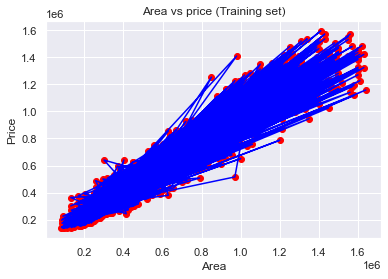

In [155]:
#Plot to see the predicted values on train set
plt.scatter(y_train, pred_stack_train, color = 'red')
plt.plot(y_train, stack.predict(X_train), color = 'blue')
plt.title('Area vs price (Training set)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

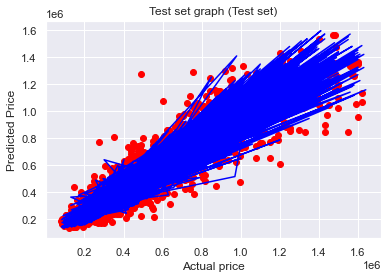

In [156]:
#Plot to see the predicted values on test set
plt.scatter(y_test, pred_stack_test, color = 'red')
plt.plot(y_train, stack.predict(X_train), color = 'blue')
plt.title('Test set graph (Test set)')
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.show()

(70636.4385566412, 1880615.765947481, 117564.10109209103, 1927543.4284829309)

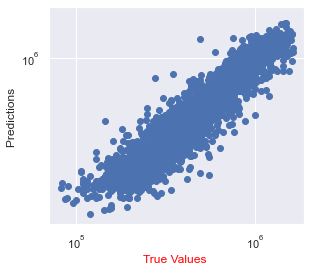

In [157]:
g=plt.scatter(y_test, pred_stack_test)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ',color='red')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

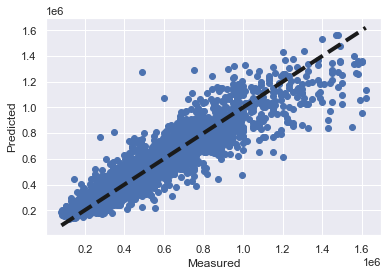

In [158]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_stack_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Pipeline build

In [161]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
pipe=Pipeline([("scaler",MinMaxScaler()),("Stack",StackingCVRegressor(regressors=[Rf_model_rd, GB_model_rd, dTree_rd,Ada_rd,rid_model], 
                          meta_regressor=GB_model_rd))])
pipe.fit(X_train,y_train)
print("Test score :{:.2f}".format(pipe.score(X_test,y_test)))

Test score :0.87


# Conclusion

On comparing the various models based on Accuracy we find that Random Forest Random search and Gradient Boost with random search works the best with accuracy of 0.873969 & 0.879377 and Ada-boosting without random search parameter model performs least with an accuracy of 0.636452.
In Stacking model, we have combined Random Forest random search ,Gradient boost random search model, Ada boost random search , Decision Tree & Ridge model with random search. So for better prediction and to achieve a more generalised model we will be selecting Stacking Model which is the combination of all the best regressors as our final model which has the accuracy of 0.872116.


Graph has been plotted between Area vs price (Training set) using scatter plot.

Graph has been plotted between Actual price vs Predicted Price using scatter plot.

Graph has been plotted between Actual price vs Predicted Price using scatter plot.
